# COMP3407 Assingment 2
## The Problem

The problem that has been decided is to identify a Pokémon’s habitat based of the different factors the Pokémon may have. These factors include the Pokémon’s types as it can have one or two types, the stats of the Pokémon which are, Attack, Defence, Special attack, Special defence, Hit points, speed, the sum of all these called the Total and if the Pokémon is a legendary.

Each Stat determines an attribute the Pokémon has when playing the game, these attributes are:

•	Attack: How much damage will a Physical attack do

•	Defence: How much damage will the Pokémon take from a Physical attack

•	Special Attack: How much damage a non-Physical Attack do

•	Special Defence: How much damage will the Pokémon take from a non-Physical Attack

•	Speed: How fast the Pokémon can move, this determines which Pokémon attacks first in a battle

•	Hit Points: how much heath the Pokémon has

•	Total: The sum of the stats

(Bulbapedia 2022)

Habitats are the type of area the Pokémon lives in and is categorised into the following: 

•	Grassland

•	Forest

•	Water’s edge 

•	Sea

•	Cave

•	Mountain

•	Rough Terrain

•	Urban

•	Rare

(Bulbapedia 2022)

Each habitat has Pokémon unique to it that cannot be found in any other habitat. This makes the habitat unique as these Pokémon evolve from each other or a similar types of Pokémon (Bulbapedia 2022). This could allow for the habitat to be categorised with the type of Pokémon allowing for it to be predicted depending on the Pokémon.

The goal of the algorithm is to find where the Pokémon’s habitat is by entering the Pokémon’s stats and types which can all be defined by data and keys. The Pokémon’s habitat will be labelled in a key which corresponds to where they live, this is the same as the type of the Pokémon each type will have a key which will correspond to their type. If the Pokémon is a legendary will be stored as a 1 or a 0. The Stats and the Total will be stored as Natural numbers, this because they cannot be negative or have a decimal.

The data set that will be used for this problem is the Pokémon With Stats dataset which can be found here: https://www.kaggle.com/datasets/abcsds/pokemon?resource=download  . This provides the Pokémon’s stats, type and if the Pokémon is a legendary. From this only the first 151 Pokémon were used as the habitats for those are clearly defined.

We have appended onto this the habitats of the Pokémon which can be found here: https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_habitat . This provides the names of the habitats and which Pokémon lives there, however a key was used to add this data onto the Pokémon with stats dataset.
By using the dataset and the habitats of the Pokémon it is possible to create a supervised learning algorithm to predict the habitat a Pokémon may live in, this can then be expanded to more Pokémon if there habitat is well known.


## My Approach To The Problem

### The approach

Supervised learning is a type of algorithm where the inputs of the data have a correct output that we know (Javapoint, no date). A supervised learning approach is relevant to the dataset as we know which habitat the Pokémon lives in which is translated to a number. An unsupervised learning approach can still be used in this situation however since we know what the output should be. Unsupervised learning algorithms do not need labelled data as they will find patterns within the data (Javapoint, no date)

This means that this is a Multiclass classification problem as there are more than two habitats that a Pokémon can be in (Nabi, J 2018). This can be changed to predict if a Pokémon lives in a certain habitat, or it doesn’t however for this problem a Multiclass would be better. However, reducing this to a binary classification could make the algorithm more accurate.

I will be using a neural network to solve this problem, A neural network has an input layer which takes all the inputs that the network needs, hidden layers which process the data that is given and an output layer which outputs an answer for the data given. Neural networks are able to answer non-linear and complex relationships between the data and the output, they can use unseen relations between data and do not restrict data when inputted (Mahanta, J 2017).

### How I’ll ensure its accurate 

Neural networks can be overfitted very easily which can cause the model to become inaccurate when trying to predict, to avoid this I will be making the model as simple as possible to avoid having too many parameters as well as stopping early so the model is stopped when it is most accurate (Sagar, A 2019).

I will be using a train test spilt, this will give the algorithm different data to train on and different data to test to see if the algorithm is accurate (Brownlee, J 2020). For this problem I will be doing an 80% training and a 20% testing which means 80% of the data is used for training and 20% is used to validate the data. This can help to estimate the performance of the neural network as it has to predict data not used to train. This can show if the network is learning the problem or the data (Brownlee, J 2020).

Finally to measure the accuracy of the network I will be using a confusion matrix. This breaks the outputs into four categories, True Negative, False Negative, False Positive and True Positive. From this I can calculate the F1 score of the algorithm which takes into account the Precision and the recall. To calculate the F1 score the formula used it F1 = 2 * ((Precision * Recall) / (Precision + Recall)). For the algorithm to be accurate the F1 score needs to be as close to 1 as possible. If the score is close to 0 this means the algorithm is not accurate (N B, H 2019).


## The Performance

In [23]:
#Importing all the needed libarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense      
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
import keras as k

In [24]:
#Reading the File
df = pd.read_excel('GottaClassEmAll.xlsx',  sheet_name='GottaClassEmAll', header=0)
print(df)

       #  Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  \
0      1       5       8    318   45      49       49       65       65   
1      2       5       8    405   60      62       63       80       80   
2      3       5       8    525   80      82       83      100      100   
3      4       2       2    309   39      52       43       60       50   
4      5       2       2    405   58      64       58       80       65   
..   ...     ...     ...    ...  ...     ...      ...      ...      ...   
146  147      15      15    300   41      64       45       50       50   
147  148      15      15    420   61      84       65       70       70   
148  149      15      10    600   91     134       95      100      100   
149  150      11      11    680  106     110       90      154       90   
150  151      11      11    600  100     100      100      100      100   

     Speed  Legendary  Habitat  
0       45          0        1  
1       60          0        1  


In [25]:
#Dropping the Pokemons Number and Habitat from the data
x = df.drop(['#' , 'Habitat'], axis = 1)
#Only using the Habitat
y = df[['Habitat']]

#splitting the data into 80% training and 20% testing and Shuffling the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=True)

In [26]:
print(x_train)

     Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
113       5       5    435   65      55      115      100       40     60   
141      13      10    515   80     105       65       60       75    130   
88        8       8    500  105     105       75       65      100     50   
109       8       8    490   65      90      120       85       70     60   
0         5       8    318   45      49       49       65       65     45   
..      ...     ...    ...  ...     ...      ...      ...      ...    ...   
107       1       1    385   90      55       75       60       75     30   
15        1      10    251   40      45       40       35       35     56   
82        1      10    352   52      65       55       58       62     60   
128       3       3    200   20      10       55       15       20     80   
122      12      10    500   70     110       80       55       80    105   

     Legendary  
113          0  
141          0  
88           0  
109    

In [27]:
print(y_train)

     Habitat
113        1
141        6
88         8
109        8
0          1
..       ...
107        1
15         2
82         1
128        3
122        1

[120 rows x 1 columns]


In [28]:
##Building the model
model = Sequential()
#Adding a Dense Layer of 10 nodes
model.add(Dense(10, input_shape=(10, ), activation='linear'))
#Adding a Dense Layer of 256 nodes
model.add(Dense(256, activation='sigmoid'))
#Adding a Dense Layer of 256 nodes
model.add(Dense(256, activation='linear'))
#Adding a Dense Layer of 1 node as an output
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 68,975
Trainable params: 68,975
Non-trainable params: 0
_________________________________________________________________


In [29]:
#setup the optimiser, loss and error functions
model.compile(loss = "mse", optimizer="adam",metrics=["accuracy"] )
#Trains the model
plot_data = model.fit(x_train, y_train, epochs=10000)

Epoch 1/10000
4/4 [==============================] - 0s 999us/step - loss: 10.7786 - accuracy: 0.2417
Epoch 2/10000
4/4 [==============================] - 0s 1ms/step - loss: 8.2479 - accuracy: 0.2417
Epoch 3/10000
4/4 [==============================] - 0s 1ms/step - loss: 7.1641 - accuracy: 0.2417
Epoch 4/10000
4/4 [==============================] - 0s 1ms/step - loss: 6.4767 - accuracy: 0.2417
Epoch 5/10000
4/4 [==============================] - 0s 1ms/step - loss: 6.3489 - accuracy: 0.2417
Epoch 6/10000
4/4 [==============================] - 0s 1ms/step - loss: 5.7071 - accuracy: 0.2417
Epoch 7/10000
4/4 [==============================] - 0s 998us/step - loss: 5.7441 - accuracy: 0.2417
Epoch 8/10000
4/4 [==============================] - 0s 999us/step - loss: 5.5058 - accuracy: 0.2417
Epoch 9/10000
4/4 [==============================] - 0s 1000us/step - loss: 5.1326 - accuracy: 0.2417
Epoch 10/10000
4/4 [==============================] - 0s 1000us/step - loss: 4.9532 - accuracy: 0.2

4/4 [==============================] - 0s 1ms/step - loss: 2.1161 - accuracy: 0.2417
Epoch 162/10000
4/4 [==============================] - 0s 750us/step - loss: 2.2829 - accuracy: 0.2167
Epoch 163/10000
4/4 [==============================] - 0s 750us/step - loss: 3.0318 - accuracy: 0.2167
Epoch 164/10000
4/4 [==============================] - 0s 750us/step - loss: 2.1902 - accuracy: 0.2417
Epoch 165/10000
4/4 [==============================] - 0s 1ms/step - loss: 2.1529 - accuracy: 0.2250
Epoch 166/10000
4/4 [==============================] - 0s 1ms/step - loss: 2.2427 - accuracy: 0.2333
Epoch 167/10000
4/4 [==============================] - 0s 750us/step - loss: 1.8927 - accuracy: 0.2417
Epoch 168/10000
4/4 [==============================] - 0s 750us/step - loss: 1.8856 - accuracy: 0.2417
Epoch 169/10000
4/4 [==============================] - 0s 982us/step - loss: 1.8564 - accuracy: 0.2417
Epoch 170/10000
4/4 [==============================] - 0s 750us/step - loss: 1.8971 - accuracy:

4/4 [==============================] - 0s 751us/step - loss: 1.8012 - accuracy: 0.2000
Epoch 242/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.6193 - accuracy: 0.2250
Epoch 243/10000
4/4 [==============================] - 0s 750us/step - loss: 1.5739 - accuracy: 0.2417
Epoch 244/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.5709 - accuracy: 0.2333
Epoch 245/10000
4/4 [==============================] - 0s 1000us/step - loss: 1.4910 - accuracy: 0.2167
Epoch 246/10000
4/4 [==============================] - 0s 750us/step - loss: 1.5960 - accuracy: 0.2333
Epoch 247/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.3944 - accuracy: 0.2417
Epoch 248/10000
4/4 [==============================] - 0s 999us/step - loss: 1.4876 - accuracy: 0.2333
Epoch 249/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.5541 - accuracy: 0.2333
Epoch 250/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.3925 - accuracy: 0.

Epoch 321/10000
4/4 [==============================] - 0s 750us/step - loss: 1.5963 - accuracy: 0.2250
Epoch 322/10000
4/4 [==============================] - 0s 976us/step - loss: 1.5003 - accuracy: 0.2000
Epoch 323/10000
4/4 [==============================] - 0s 750us/step - loss: 2.0870 - accuracy: 0.2083
Epoch 324/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.9034 - accuracy: 0.2250
Epoch 325/10000
4/4 [==============================] - 0s 749us/step - loss: 1.6783 - accuracy: 0.2083
Epoch 326/10000
4/4 [==============================] - 0s 750us/step - loss: 2.1181 - accuracy: 0.2083
Epoch 327/10000
4/4 [==============================] - 0s 1000us/step - loss: 1.7001 - accuracy: 0.2417
Epoch 328/10000
4/4 [==============================] - 0s 750us/step - loss: 1.5575 - accuracy: 0.2083
Epoch 329/10000
4/4 [==============================] - 0s 750us/step - loss: 1.9834 - accuracy: 0.1833
Epoch 330/10000
4/4 [==============================] - 0s 750us/step - los

4/4 [==============================] - 0s 750us/step - loss: 0.9357 - accuracy: 0.1750
Epoch 481/10000
4/4 [==============================] - 0s 750us/step - loss: 1.5777 - accuracy: 0.1750
Epoch 482/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.6079 - accuracy: 0.2250
Epoch 483/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.3103 - accuracy: 0.2083
Epoch 484/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.8568 - accuracy: 0.2250
Epoch 485/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.8257 - accuracy: 0.1833
Epoch 486/10000
4/4 [==============================] - 0s 750us/step - loss: 0.9746 - accuracy: 0.1917
Epoch 487/10000
4/4 [==============================] - 0s 750us/step - loss: 1.0602 - accuracy: 0.2250
Epoch 488/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.7549 - accuracy: 0.2250
Epoch 489/10000
4/4 [==============================] - 0s 750us/step - loss: 0.6392 - accuracy: 

4/4 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.2000
Epoch 561/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.2333
Epoch 562/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.2083
Epoch 563/10000
4/4 [==============================] - 0s 750us/step - loss: 0.7552 - accuracy: 0.1917
Epoch 564/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.8693 - accuracy: 0.1833
Epoch 565/10000
4/4 [==============================] - 0s 750us/step - loss: 0.6074 - accuracy: 0.2250
Epoch 566/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.2250
Epoch 567/10000
4/4 [==============================] - 0s 750us/step - loss: 0.7069 - accuracy: 0.1833
Epoch 568/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.0355 - accuracy: 0.2167
Epoch 569/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.2519 - accuracy: 0.19

4/4 [==============================] - 0s 999us/step - loss: 0.4336 - accuracy: 0.1917
Epoch 720/10000
4/4 [==============================] - 0s 750us/step - loss: 0.3456 - accuracy: 0.2167
Epoch 721/10000
4/4 [==============================] - 0s 750us/step - loss: 0.3083 - accuracy: 0.2417
Epoch 722/10000
4/4 [==============================] - 0s 750us/step - loss: 0.3428 - accuracy: 0.2167
Epoch 723/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2357 - accuracy: 0.2333
Epoch 724/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.2649 - accuracy: 0.2250
Epoch 725/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.3048 - accuracy: 0.2167
Epoch 726/10000
4/4 [==============================] - 0s 750us/step - loss: 0.3092 - accuracy: 0.2417
Epoch 727/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.3369 - accuracy: 0.2083
Epoch 728/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2499 - 

Epoch 878/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1884 - accuracy: 0.2417
Epoch 879/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1560 - accuracy: 0.2167
Epoch 880/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1703 - accuracy: 0.2333
Epoch 881/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1456 - accuracy: 0.2333
Epoch 882/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1489 - accuracy: 0.2417
Epoch 883/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1373 - accuracy: 0.2417
Epoch 884/10000
4/4 [==============================] - 0s 747us/step - loss: 0.1469 - accuracy: 0.2167
Epoch 885/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1467 - accuracy: 0.2417
Epoch 886/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1355 - accuracy: 0.2417
Epoch 887/10000
4/4 [==============================] - 0s 750us/step - loss: 0

4/4 [==============================] - 0s 1ms/step - loss: 0.2821 - accuracy: 0.2250
Epoch 1037/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.1750
Epoch 1038/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2736 - accuracy: 0.2333
Epoch 1039/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1758 - accuracy: 0.2333
Epoch 1040/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2441 - accuracy: 0.2417
Epoch 1041/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1676 - accuracy: 0.2167
Epoch 1042/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.2333
Epoch 1043/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1241 - accuracy: 0.2250
Epoch 1044/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1242 - accuracy: 0.2333
Epoch 1045/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1053 -

4/4 [==============================] - 0s 753us/step - loss: 0.1011 - accuracy: 0.2250
Epoch 1195/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1075 - accuracy: 0.2417
Epoch 1196/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0940 - accuracy: 0.2417
Epoch 1197/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.2417
Epoch 1198/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0925 - accuracy: 0.2417
Epoch 1199/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1019 - accuracy: 0.2417
Epoch 1200/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1137 - accuracy: 0.2417
Epoch 1201/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1253 - accuracy: 0.2417
Epoch 1202/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1017 - accuracy: 0.2417
Epoch 1203/10000
4/4 [==============================] - 0s 750us/step - loss: 0.

4/4 [==============================] - 0s 750us/step - loss: 0.0698 - accuracy: 0.2417
Epoch 1353/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0951 - accuracy: 0.2417
Epoch 1354/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0905 - accuracy: 0.2417
Epoch 1355/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1300 - accuracy: 0.2250
Epoch 1356/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.2044 - accuracy: 0.2083
Epoch 1357/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1680 - accuracy: 0.2333
Epoch 1358/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.2417
Epoch 1359/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1627 - accuracy: 0.2417
Epoch 1360/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1089 - accuracy: 0.2333
Epoch 1361/10000
4/4 [==============================] - 0s 750us/step - loss: 0.112

4/4 [==============================] - 0s 1ms/step - loss: 0.0561 - accuracy: 0.2417
Epoch 1432/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0766 - accuracy: 0.2417
Epoch 1433/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0788 - accuracy: 0.2417
Epoch 1434/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0922 - accuracy: 0.2417
Epoch 1435/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0832 - accuracy: 0.2333
Epoch 1436/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0988 - accuracy: 0.2417
Epoch 1437/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1267 - accuracy: 0.2083
Epoch 1438/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1772 - accuracy: 0.2417
Epoch 1439/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1223 - accuracy: 0.2333
Epoch 1440/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0993

4/4 [==============================] - 0s 750us/step - loss: 0.0981 - accuracy: 0.2333
Epoch 1511/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0906 - accuracy: 0.2417
Epoch 1512/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0988 - accuracy: 0.2417
Epoch 1513/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0665 - accuracy: 0.2417
Epoch 1514/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1338 - accuracy: 0.2417
Epoch 1515/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1995 - accuracy: 0.2167
Epoch 1516/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1300 - accuracy: 0.2333
Epoch 1517/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1554 - accuracy: 0.2250
Epoch 1518/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1376 - accuracy: 0.2250
Epoch 1519/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1017 -

4/4 [==============================] - 0s 1000us/step - loss: 0.0914 - accuracy: 0.2417
Epoch 1590/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1391 - accuracy: 0.2250
Epoch 1591/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1312 - accuracy: 0.2417
Epoch 1592/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2132 - accuracy: 0.2250
Epoch 1593/10000
4/4 [==============================] - 0s 749us/step - loss: 0.1392 - accuracy: 0.2333
Epoch 1594/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1726 - accuracy: 0.2083
Epoch 1595/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.2233 - accuracy: 0.2167
Epoch 1596/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1926 - accuracy: 0.2000
Epoch 1597/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.2167
Epoch 1598/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1830 - 

4/4 [==============================] - 0s 1ms/step - loss: 0.0946 - accuracy: 0.2333
Epoch 1748/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0848 - accuracy: 0.2417
Epoch 1749/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0978 - accuracy: 0.2417
Epoch 1750/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.2333
Epoch 1751/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1423 - accuracy: 0.2417
Epoch 1752/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1958 - accuracy: 0.2417
Epoch 1753/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.2939 - accuracy: 0.2083
Epoch 1754/10000
4/4 [==============================] - 0s 751us/step - loss: 0.1953 - accuracy: 0.2250
Epoch 1755/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2325 - accuracy: 0.2250
Epoch 1756/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.3210 - 

4/4 [==============================] - 0s 750us/step - loss: 0.1381 - accuracy: 0.2167
Epoch 1906/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.2250
Epoch 1907/10000
4/4 [==============================] - 0s 999us/step - loss: 0.1460 - accuracy: 0.2333
Epoch 1908/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.1484 - accuracy: 0.2333
Epoch 1909/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1916 - accuracy: 0.2083
Epoch 1910/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1323 - accuracy: 0.2333
Epoch 1911/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.2083
Epoch 1912/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2676 - accuracy: 0.2167
Epoch 1913/10000
4/4 [==============================] - 0s 751us/step - loss: 0.2553 - accuracy: 0.2250
Epoch 1914/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.231

4/4 [==============================] - 0s 751us/step - loss: 0.1715 - accuracy: 0.2333
Epoch 2064/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.2417
Epoch 2065/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0891 - accuracy: 0.2333
Epoch 2066/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1262 - accuracy: 0.2250
Epoch 2067/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0889 - accuracy: 0.2333
Epoch 2068/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0828 - accuracy: 0.2333
Epoch 2069/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0827 - accuracy: 0.2417
Epoch 2070/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1136 - accuracy: 0.2250
Epoch 2071/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1648 - accuracy: 0.2250
Epoch 2072/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1706

4/4 [==============================] - 0s 750us/step - loss: 0.1667 - accuracy: 0.2417
Epoch 2222/10000
4/4 [==============================] - 0s 750us/step - loss: 0.3160 - accuracy: 0.2000
Epoch 2223/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2583 - accuracy: 0.2417
Epoch 2224/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1114 - accuracy: 0.2417
Epoch 2225/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0904 - accuracy: 0.2250
Epoch 2226/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0890 - accuracy: 0.2250
Epoch 2227/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1003 - accuracy: 0.2167
Epoch 2228/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 0.2417
Epoch 2229/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0966 - accuracy: 0.2417
Epoch 2230/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0523 

4/4 [==============================] - 0s 750us/step - loss: 0.2970 - accuracy: 0.2167
Epoch 2301/10000
4/4 [==============================] - 0s 999us/step - loss: 0.4441 - accuracy: 0.2250
Epoch 2302/10000
4/4 [==============================] - 0s 750us/step - loss: 0.5094 - accuracy: 0.2083
Epoch 2303/10000
4/4 [==============================] - 0s 749us/step - loss: 0.4351 - accuracy: 0.2333
Epoch 2304/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.3402 - accuracy: 0.2167
Epoch 2305/10000
4/4 [==============================] - 0s 750us/step - loss: 0.3819 - accuracy: 0.2083
Epoch 2306/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.3589 - accuracy: 0.2417
Epoch 2307/10000
4/4 [==============================] - 0s 750us/step - loss: 0.3562 - accuracy: 0.1917
Epoch 2308/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2837 - accuracy: 0.2250
Epoch 2309/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1471

4/4 [==============================] - 0s 1ms/step - loss: 0.0247 - accuracy: 0.2417
Epoch 2380/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0252 - accuracy: 0.2417
Epoch 2381/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0302 - accuracy: 0.2417
Epoch 2382/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0272 - accuracy: 0.2417
Epoch 2383/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0352 - accuracy: 0.2417
Epoch 2384/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0524 - accuracy: 0.2417
Epoch 2385/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0535 - accuracy: 0.2417
Epoch 2386/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0435 - accuracy: 0.2417
Epoch 2387/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0338 - accuracy: 0.2417
Epoch 2388/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0544 -

4/4 [==============================] - 0s 750us/step - loss: 0.0568 - accuracy: 0.2417
Epoch 2459/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0866 - accuracy: 0.2333
Epoch 2460/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1133 - accuracy: 0.2333
Epoch 2461/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.2417
Epoch 2462/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0949 - accuracy: 0.2417
Epoch 2463/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1743 - accuracy: 0.2000
Epoch 2464/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.2083
Epoch 2465/10000
4/4 [==============================] - 0s 749us/step - loss: 0.2137 - accuracy: 0.2333
Epoch 2466/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2162 - accuracy: 0.2167
Epoch 2467/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2428 

4/4 [==============================] - 0s 1000us/step - loss: 0.0494 - accuracy: 0.2417
Epoch 2538/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0617 - accuracy: 0.2333
Epoch 2539/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0397 - accuracy: 0.2417
Epoch 2540/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0359 - accuracy: 0.2417
Epoch 2541/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.2417
Epoch 2542/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0527 - accuracy: 0.2417
Epoch 2543/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0914 - accuracy: 0.2417
Epoch 2544/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0795 - accuracy: 0.2333
Epoch 2545/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.2417
Epoch 2546/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0916 - 

4/4 [==============================] - 0s 750us/step - loss: 0.0759 - accuracy: 0.2417
Epoch 2696/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0780 - accuracy: 0.2250
Epoch 2697/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.2417
Epoch 2698/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.2417
Epoch 2699/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.2417
Epoch 2700/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0396 - accuracy: 0.2417
Epoch 2701/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0408 - accuracy: 0.2417
Epoch 2702/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0584 - accuracy: 0.2417
Epoch 2703/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0539 - accuracy: 0.2417
Epoch 2704/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0513 - ac

4/4 [==============================] - 0s 749us/step - loss: 0.0494 - accuracy: 0.2417
Epoch 2854/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0305 - accuracy: 0.2417
Epoch 2855/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0372 - accuracy: 0.2417
Epoch 2856/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0486 - accuracy: 0.2417
Epoch 2857/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0350 - accuracy: 0.2417
Epoch 2858/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0511 - accuracy: 0.2333
Epoch 2859/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0437 - accuracy: 0.2417
Epoch 2860/10000
4/4 [==============================] - 0s 997us/step - loss: 0.0468 - accuracy: 0.2417
Epoch 2861/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0624 - accuracy: 0.2333
Epoch 2862/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0

4/4 [==============================] - 0s 1ms/step - loss: 0.0863 - accuracy: 0.2417
Epoch 2933/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0981 - accuracy: 0.2250
Epoch 2934/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0748 - accuracy: 0.2417
Epoch 2935/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0699 - accuracy: 0.2417
Epoch 2936/10000
4/4 [==============================] - 0s 998us/step - loss: 0.0375 - accuracy: 0.2417
Epoch 2937/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0318 - accuracy: 0.2417
Epoch 2938/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0250 - accuracy: 0.2417
Epoch 2939/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0176 - accuracy: 0.2417
Epoch 2940/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0175 - accuracy: 0.2417
Epoch 2941/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0271

4/4 [==============================] - 0s 750us/step - loss: 0.0221 - accuracy: 0.2417
Epoch 3091/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.2417
Epoch 3092/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0121 - accuracy: 0.2417
Epoch 3093/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0113 - accuracy: 0.2417
Epoch 3094/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.2417
Epoch 3095/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0076 - accuracy: 0.2417
Epoch 3096/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0070 - accuracy: 0.2417
Epoch 3097/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0075 - accuracy: 0.2417
Epoch 3098/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0087 - accuracy: 0.2417
Epoch 3099/10000
4/4 [==============================] - 0s 2ms/step - loss: 0.0082 - 

4/4 [==============================] - 0s 749us/step - loss: 0.0325 - accuracy: 0.2417
Epoch 3249/10000
4/4 [==============================] - 0s 751us/step - loss: 0.0239 - accuracy: 0.2417
Epoch 3250/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0283 - accuracy: 0.2417
Epoch 3251/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0459 - accuracy: 0.2417
Epoch 3252/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0558 - accuracy: 0.2417
Epoch 3253/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0762 - accuracy: 0.2417
Epoch 3254/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.2333
Epoch 3255/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1083 - accuracy: 0.2417
Epoch 3256/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1011 - accuracy: 0.2417
Epoch 3257/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0685 - 

4/4 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.2417
Epoch 3407/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0462 - accuracy: 0.2333
Epoch 3408/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0342 - accuracy: 0.2417
Epoch 3409/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0956 - accuracy: 0.2333
Epoch 3410/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0698 - accuracy: 0.2417
Epoch 3411/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.2333
Epoch 3412/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0695 - accuracy: 0.2333
Epoch 3413/10000
4/4 [==============================] - 0s 751us/step - loss: 0.0669 - accuracy: 0.2333
Epoch 3414/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0482 - accuracy: 0.2417
Epoch 3415/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0488 

4/4 [==============================] - 0s 1ms/step - loss: 0.0104 - accuracy: 0.2417
Epoch 3565/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0123 - accuracy: 0.2417
Epoch 3566/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0151 - accuracy: 0.2417
Epoch 3567/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0123 - accuracy: 0.2417
Epoch 3568/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0168 - accuracy: 0.2417
Epoch 3569/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.2417
Epoch 3570/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.2417
Epoch 3571/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0115 - accuracy: 0.2417
Epoch 3572/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.2417
Epoch 3573/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0061 - a

4/4 [==============================] - 0s 750us/step - loss: 0.0092 - accuracy: 0.2417
Epoch 3723/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0108 - accuracy: 0.2417
Epoch 3724/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0120 - accuracy: 0.2417
Epoch 3725/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0104 - accuracy: 0.2417
Epoch 3726/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0202 - accuracy: 0.2417
Epoch 3727/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0204 - accuracy: 0.2417
Epoch 3728/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0142 - accuracy: 0.2417
Epoch 3729/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0131 - accuracy: 0.2417
Epoch 3730/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 0.2417
Epoch 3731/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0

4/4 [==============================] - 0s 750us/step - loss: 0.0144 - accuracy: 0.2417
Epoch 3802/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0162 - accuracy: 0.2417
Epoch 3803/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0148 - accuracy: 0.2417
Epoch 3804/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0078 - accuracy: 0.2417
Epoch 3805/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.2417
Epoch 3806/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0124 - accuracy: 0.2417
Epoch 3807/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0128 - accuracy: 0.2417
Epoch 3808/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0083 - accuracy: 0.2417
Epoch 3809/10000
4/4 [==============================] - 0s 752us/step - loss: 0.0098 - accuracy: 0.2417
Epoch 3810/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0133 

4/4 [==============================] - 0s 750us/step - loss: 0.0035 - accuracy: 0.2417
Epoch 3960/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 0.2417
Epoch 3961/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0030 - accuracy: 0.2417
Epoch 3962/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.2417
Epoch 3963/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.2417
Epoch 3964/10000
4/4 [==============================] - 0s 751us/step - loss: 0.0024 - accuracy: 0.2417
Epoch 3965/10000
4/4 [==============================] - 0s 751us/step - loss: 0.0023 - accuracy: 0.2417
Epoch 3966/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.2417
Epoch 3967/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0035 - accuracy: 0.2417
Epoch 3968/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0036 - a

4/4 [==============================] - 0s 750us/step - loss: 0.6558 - accuracy: 0.1833
Epoch 4118/10000
4/4 [==============================] - 0s 750us/step - loss: 0.5746 - accuracy: 0.2083
Epoch 4119/10000
4/4 [==============================] - 0s 750us/step - loss: 0.4240 - accuracy: 0.2417
Epoch 4120/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.2079 - accuracy: 0.2417
Epoch 4121/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.2000
Epoch 4122/10000
4/4 [==============================] - 0s 750us/step - loss: 0.3190 - accuracy: 0.2083
Epoch 4123/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.2796 - accuracy: 0.2333
Epoch 4124/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2054 - accuracy: 0.2167
Epoch 4125/10000
4/4 [==============================] - 0s 750us/step - loss: 0.2584 - accuracy: 0.2083
Epoch 4126/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1441 - ac

4/4 [==============================] - 0s 750us/step - loss: 0.0146 - accuracy: 0.2417
Epoch 4276/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0085 - accuracy: 0.2417
Epoch 4277/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0065 - accuracy: 0.2417
Epoch 4278/10000
4/4 [==============================] - 0s 753us/step - loss: 0.0039 - accuracy: 0.2417
Epoch 4279/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 0.2417
Epoch 4280/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0042 - accuracy: 0.2417
Epoch 4281/10000
4/4 [==============================] - 0s 751us/step - loss: 0.0024 - accuracy: 0.2417
Epoch 4282/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0026 - accuracy: 0.2417
Epoch 4283/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0035 - accuracy: 0.2417
Epoch 4284/10000
4/4 [==============================] - 0s 751us/step - loss: 0.0024

4/4 [==============================] - 0s 1ms/step - loss: 0.0134 - accuracy: 0.2417
Epoch 4434/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0165 - accuracy: 0.2417
Epoch 4435/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0126 - accuracy: 0.2417
Epoch 4436/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0089 - accuracy: 0.2417
Epoch 4437/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0116 - accuracy: 0.2417
Epoch 4438/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.2417
Epoch 4439/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0066 - accuracy: 0.2417
Epoch 4440/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0056 - accuracy: 0.2417
Epoch 4441/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.2417
Epoch 4442/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0070 - a

4/4 [==============================] - 0s 999us/step - loss: 0.0013 - accuracy: 0.2417
Epoch 4591/10000
4/4 [==============================] - 0s 750us/step - loss: 9.0879e-04 - accuracy: 0.2417
Epoch 4592/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0012 - accuracy: 0.2417
Epoch 4593/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0014 - accuracy: 0.2417
Epoch 4594/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0010 - accuracy: 0.2417
Epoch 4595/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0011 - accuracy: 0.2417
Epoch 4596/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0010 - accuracy: 0.2417
Epoch 4597/10000
4/4 [==============================] - 0s 750us/step - loss: 8.0923e-04 - accuracy: 0.2417
Epoch 4598/10000
4/4 [==============================] - 0s 1ms/step - loss: 9.6951e-04 - accuracy: 0.2417
Epoch 4599/10000
4/4 [==============================] - 0s 749us/step

4/4 [==============================] - 0s 999us/step - loss: 0.0021 - accuracy: 0.2417
Epoch 4748/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0026 - accuracy: 0.2417
Epoch 4749/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0027 - accuracy: 0.2417
Epoch 4750/10000
4/4 [==============================] - 0s 751us/step - loss: 0.0023 - accuracy: 0.2417
Epoch 4751/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.2417
Epoch 4752/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0019 - accuracy: 0.2417
Epoch 4753/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0017 - accuracy: 0.2417
Epoch 4754/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0024 - accuracy: 0.2417
Epoch 4755/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.2417
Epoch 4756/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0013 

Epoch 4826/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.2417
Epoch 4827/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0087 - accuracy: 0.2417
Epoch 4828/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0069 - accuracy: 0.2417
Epoch 4829/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0077 - accuracy: 0.2417
Epoch 4830/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0078 - accuracy: 0.2417
Epoch 4831/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0109 - accuracy: 0.2417
Epoch 4832/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0124 - accuracy: 0.2417
Epoch 4833/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 0.2417
Epoch 4834/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.2417
Epoch 4835/10000
4/4 [==============================] - 0s 750us/step

4/4 [==============================] - 0s 1ms/step - loss: 0.1671 - accuracy: 0.2333
Epoch 4906/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1089 - accuracy: 0.2333
Epoch 4907/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1459 - accuracy: 0.2333
Epoch 4908/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1658 - accuracy: 0.2417
Epoch 4909/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1193 - accuracy: 0.2417
Epoch 4910/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.1142 - accuracy: 0.2417
Epoch 4911/10000
4/4 [==============================] - 0s 749us/step - loss: 0.1104 - accuracy: 0.2333
Epoch 4912/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0928 - accuracy: 0.2250
Epoch 4913/10000
4/4 [==============================] - 0s 750us/step - loss: 0.1276 - accuracy: 0.2417
Epoch 4914/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0990 -

4/4 [==============================] - 0s 750us/step - loss: 0.0029 - accuracy: 0.2417
Epoch 5063/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.2417
Epoch 5064/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0021 - accuracy: 0.2417
Epoch 5065/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0023 - accuracy: 0.2417
Epoch 5066/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0022 - accuracy: 0.2417
Epoch 5067/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0026 - accuracy: 0.2417
Epoch 5068/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.2417
Epoch 5069/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0017 - accuracy: 0.2417
Epoch 5070/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0016 - accuracy: 0.2417
Epoch 5071/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0015

4/4 [==============================] - 0s 1000us/step - loss: 0.0137 - accuracy: 0.2417
Epoch 5221/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0254 - accuracy: 0.2417
Epoch 5222/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0305 - accuracy: 0.2417
Epoch 5223/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0150 - accuracy: 0.2417
Epoch 5224/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0163 - accuracy: 0.2417
Epoch 5225/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0127 - accuracy: 0.2417
Epoch 5226/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0114 - accuracy: 0.2417
Epoch 5227/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0089 - accuracy: 0.2417
Epoch 5228/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0082 - accuracy: 0.2417
Epoch 5229/10000
4/4 [==============================] - 0s 750us/step - loss: 

4/4 [==============================] - 0s 750us/step - loss: 0.0296 - accuracy: 0.2417
Epoch 5377/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0252 - accuracy: 0.2417
Epoch 5378/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0149 - accuracy: 0.2417
Epoch 5379/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0214 - accuracy: 0.2417
Epoch 5380/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0188 - accuracy: 0.2417
Epoch 5381/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0112 - accuracy: 0.2417
Epoch 5382/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.2417
Epoch 5383/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0118 - accuracy: 0.2417
Epoch 5384/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0141 - accuracy: 0.2417
Epoch 5385/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0145

4/4 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 0.2417
Epoch 5456/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0084 - accuracy: 0.2417
Epoch 5457/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0084 - accuracy: 0.2417
Epoch 5458/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0087 - accuracy: 0.2417
Epoch 5459/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0090 - accuracy: 0.2417
Epoch 5460/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0067 - accuracy: 0.2417
Epoch 5461/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 0.2417
Epoch 5462/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0038 - accuracy: 0.2417
Epoch 5463/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0049 - accuracy: 0.2417
Epoch 5464/10000
4/4 [==============================] - 0s 750us/step - loss: 0.005

4/4 [==============================] - 0s 750us/step - loss: 0.0104 - accuracy: 0.2417
Epoch 5614/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0098 - accuracy: 0.2417
Epoch 5615/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0088 - accuracy: 0.2417
Epoch 5616/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0061 - accuracy: 0.2417
Epoch 5617/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0066 - accuracy: 0.2417
Epoch 5618/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0047 - accuracy: 0.2417
Epoch 5619/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.2417
Epoch 5620/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0035 - accuracy: 0.2417
Epoch 5621/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.2417
Epoch 5622/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0019 

4/4 [==============================] - 0s 750us/step - loss: 0.0192 - accuracy: 0.2417
Epoch 5693/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0148 - accuracy: 0.2417
Epoch 5694/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0129 - accuracy: 0.2417
Epoch 5695/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0094 - accuracy: 0.2417
Epoch 5696/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 0.2417
Epoch 5697/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0101 - accuracy: 0.2417
Epoch 5698/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.2417
Epoch 5699/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0221 - accuracy: 0.2417
Epoch 5700/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.2417
Epoch 5701/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0170 - ac

4/4 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.2417
Epoch 5772/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.2417
Epoch 5773/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.2417
Epoch 5774/10000
4/4 [==============================] - 0s 1000us/step - loss: 9.7420e-04 - accuracy: 0.2417
Epoch 5775/10000
4/4 [==============================] - 0s 750us/step - loss: 8.7781e-04 - accuracy: 0.2417
Epoch 5776/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0010 - accuracy: 0.2417
Epoch 5777/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0011 - accuracy: 0.2417
Epoch 5778/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0019 - accuracy: 0.2417
Epoch 5779/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.2417
Epoch 5780/10000
4/4 [==============================] - 0s 750us/step - loss: 0

4/4 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.2417
Epoch 5929/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0027 - accuracy: 0.2417
Epoch 5930/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0024 - accuracy: 0.2417
Epoch 5931/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0036 - accuracy: 0.2417
Epoch 5932/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0029 - accuracy: 0.2417
Epoch 5933/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016 - accuracy: 0.2417
Epoch 5934/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.2417
Epoch 5935/10000
4/4 [==============================] - 0s 751us/step - loss: 0.0017 - accuracy: 0.2417
Epoch 5936/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0017 - accuracy: 0.2417
Epoch 5937/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0014 - 

4/4 [==============================] - 0s 750us/step - loss: 8.6640e-04 - accuracy: 0.2417
Epoch 6082/10000
4/4 [==============================] - 0s 751us/step - loss: 0.0010 - accuracy: 0.2417
Epoch 6083/10000
4/4 [==============================] - 0s 750us/step - loss: 9.3316e-04 - accuracy: 0.2417
Epoch 6084/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0021 - accuracy: 0.2417
Epoch 6085/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0015 - accuracy: 0.2417
Epoch 6086/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0013 - accuracy: 0.2417
Epoch 6087/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0020 - accuracy: 0.2417
Epoch 6088/10000
4/4 [==============================] - 0s 751us/step - loss: 0.0020 - accuracy: 0.2417
Epoch 6089/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0028 - accuracy: 0.2417
Epoch 6090/10000
4/4 [==============================] - 0s 750us/step -

4/4 [==============================] - 0s 750us/step - loss: 0.0149 - accuracy: 0.2417
Epoch 6161/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0287 - accuracy: 0.2417
Epoch 6162/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0307 - accuracy: 0.2417
Epoch 6163/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0165 - accuracy: 0.2417
Epoch 6164/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 0.2417
Epoch 6165/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0091 - accuracy: 0.2417
Epoch 6166/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0125 - accuracy: 0.2417
Epoch 6167/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.2417
Epoch 6168/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0244 - accuracy: 0.2417
Epoch 6169/10000
4/4 [==============================] - 0s 753us/step - loss: 0.0169 

4/4 [==============================] - 0s 1ms/step - loss: 1.6330e-04 - accuracy: 0.2417
Epoch 6316/10000
4/4 [==============================] - 0s 750us/step - loss: 1.6046e-04 - accuracy: 0.2417
Epoch 6317/10000
4/4 [==============================] - 0s 750us/step - loss: 1.3886e-04 - accuracy: 0.2417
Epoch 6318/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.4293e-04 - accuracy: 0.2417
Epoch 6319/10000
4/4 [==============================] - 0s 749us/step - loss: 1.6131e-04 - accuracy: 0.2417
Epoch 6320/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.8677e-04 - accuracy: 0.2417
Epoch 6321/10000
4/4 [==============================] - 0s 750us/step - loss: 3.2519e-04 - accuracy: 0.2417
Epoch 6322/10000
4/4 [==============================] - 0s 750us/step - loss: 2.9303e-04 - accuracy: 0.2417
Epoch 6323/10000
4/4 [==============================] - 0s 1000us/step - loss: 3.0103e-04 - accuracy: 0.2417
Epoch 6324/10000
4/4 [============================

4/4 [==============================] - 0s 750us/step - loss: 0.0157 - accuracy: 0.2417
Epoch 6470/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0166 - accuracy: 0.2417
Epoch 6471/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0153 - accuracy: 0.2417
Epoch 6472/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0102 - accuracy: 0.2417
Epoch 6473/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0059 - accuracy: 0.2417
Epoch 6474/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0051 - accuracy: 0.2417
Epoch 6475/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 0.2417
Epoch 6476/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0086 - accuracy: 0.2417
Epoch 6477/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0085 - accuracy: 0.2417
Epoch 6478/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0056 - a

4/4 [==============================] - 0s 1000us/step - loss: 0.0126 - accuracy: 0.2417
Epoch 6625/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0134 - accuracy: 0.2417
Epoch 6626/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0158 - accuracy: 0.2417
Epoch 6627/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.2417
Epoch 6628/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0078 - accuracy: 0.2417
Epoch 6629/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0063 - accuracy: 0.2417
Epoch 6630/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 0.2417
Epoch 6631/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0028 - accuracy: 0.2417
Epoch 6632/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.2417
Epoch 6633/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035 - 

4/4 [==============================] - 0s 750us/step - loss: 5.8888e-04 - accuracy: 0.2417
Epoch 6780/10000
4/4 [==============================] - 0s 1000us/step - loss: 8.0426e-04 - accuracy: 0.2417
Epoch 6781/10000
4/4 [==============================] - 0s 750us/step - loss: 6.8293e-04 - accuracy: 0.2417
Epoch 6782/10000
4/4 [==============================] - 0s 1ms/step - loss: 5.8388e-04 - accuracy: 0.2417
Epoch 6783/10000
4/4 [==============================] - 0s 1000us/step - loss: 6.2592e-04 - accuracy: 0.2417
Epoch 6784/10000
4/4 [==============================] - 0s 750us/step - loss: 6.1410e-04 - accuracy: 0.2417
Epoch 6785/10000
4/4 [==============================] - 0s 1ms/step - loss: 5.0390e-04 - accuracy: 0.2417
Epoch 6786/10000
4/4 [==============================] - 0s 749us/step - loss: 5.5537e-04 - accuracy: 0.2417
Epoch 6787/10000
4/4 [==============================] - 0s 1ms/step - loss: 6.6875e-04 - accuracy: 0.2417
Epoch 6788/10000
4/4 [===========================

4/4 [==============================] - 0s 1ms/step - loss: 6.8256e-05 - accuracy: 0.2417
Epoch 6932/10000
4/4 [==============================] - 0s 750us/step - loss: 8.7526e-05 - accuracy: 0.2417
Epoch 6933/10000
4/4 [==============================] - 0s 1000us/step - loss: 7.8450e-05 - accuracy: 0.2417
Epoch 6934/10000
4/4 [==============================] - 0s 1000us/step - loss: 4.9072e-05 - accuracy: 0.2417
Epoch 6935/10000
4/4 [==============================] - 0s 750us/step - loss: 4.5241e-05 - accuracy: 0.2417
Epoch 6936/10000
4/4 [==============================] - 0s 1ms/step - loss: 3.8716e-05 - accuracy: 0.2417
Epoch 6937/10000
4/4 [==============================] - 0s 1000us/step - loss: 3.5665e-05 - accuracy: 0.2417
Epoch 6938/10000
4/4 [==============================] - 0s 1ms/step - loss: 4.2752e-05 - accuracy: 0.2417
Epoch 6939/10000
4/4 [==============================] - 0s 750us/step - loss: 4.1394e-05 - accuracy: 0.2417
Epoch 6940/10000
4/4 [==========================

4/4 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 0.2417
Epoch 7085/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0035 - accuracy: 0.2417
Epoch 7086/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0036 - accuracy: 0.2417
Epoch 7087/10000
4/4 [==============================] - 0s 751us/step - loss: 0.0035 - accuracy: 0.2417
Epoch 7088/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 0.2417
Epoch 7089/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0025 - accuracy: 0.2417
Epoch 7090/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 0.2417
Epoch 7091/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0026 - accuracy: 0.2417
Epoch 7092/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0042 - accuracy: 0.2417
Epoch 7093/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0058 - a

4/4 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.2417
Epoch 7243/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0030 - accuracy: 0.2417
Epoch 7244/10000
4/4 [==============================] - 0s 748us/step - loss: 0.0019 - accuracy: 0.2417
Epoch 7245/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.2417
Epoch 7246/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0019 - accuracy: 0.2417
Epoch 7247/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0015 - accuracy: 0.2417
Epoch 7248/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0011 - accuracy: 0.2417
Epoch 7249/10000
4/4 [==============================] - 0s 750us/step - loss: 8.6996e-04 - accuracy: 0.2417
Epoch 7250/10000
4/4 [==============================] - 0s 750us/step - loss: 8.3946e-04 - accuracy: 0.2417
Epoch 7251/10000
4/4 [==============================] - 0s 1000us/step - loss

4/4 [==============================] - 0s 1ms/step - loss: 1.2098e-04 - accuracy: 0.2417
Epoch 7398/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.0251e-04 - accuracy: 0.2417
Epoch 7399/10000
4/4 [==============================] - 0s 750us/step - loss: 1.0251e-04 - accuracy: 0.2417
Epoch 7400/10000
4/4 [==============================] - 0s 750us/step - loss: 1.2059e-04 - accuracy: 0.2417
Epoch 7401/10000
4/4 [==============================] - 0s 750us/step - loss: 8.2451e-05 - accuracy: 0.2417
Epoch 7402/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.1155e-04 - accuracy: 0.2417
Epoch 7403/10000
4/4 [==============================] - 0s 1000us/step - loss: 1.6942e-04 - accuracy: 0.2417
Epoch 7404/10000
4/4 [==============================] - 0s 750us/step - loss: 2.7629e-04 - accuracy: 0.2417
Epoch 7405/10000
4/4 [==============================] - 0s 1000us/step - loss: 1.5987e-04 - accuracy: 0.2417
Epoch 7406/10000
4/4 [===========================

4/4 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.2333
Epoch 7554/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0725 - accuracy: 0.2333
Epoch 7555/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0652 - accuracy: 0.2417
Epoch 7556/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0531 - accuracy: 0.2417
Epoch 7557/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0368 - accuracy: 0.2417
Epoch 7558/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0289 - accuracy: 0.2417
Epoch 7559/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0348 - accuracy: 0.2417
Epoch 7560/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0378 - accuracy: 0.2417
Epoch 7561/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0432 - accuracy: 0.2333
Epoch 7562/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0398 -

4/4 [==============================] - 0s 750us/step - loss: 5.3841e-04 - accuracy: 0.2417
Epoch 7708/10000
4/4 [==============================] - 0s 750us/step - loss: 5.7315e-04 - accuracy: 0.2417
Epoch 7709/10000
4/4 [==============================] - 0s 750us/step - loss: 4.7762e-04 - accuracy: 0.2417
Epoch 7710/10000
4/4 [==============================] - 0s 750us/step - loss: 7.7595e-04 - accuracy: 0.2417
Epoch 7711/10000
4/4 [==============================] - 0s 750us/step - loss: 5.1080e-04 - accuracy: 0.2417
Epoch 7712/10000
4/4 [==============================] - 0s 1ms/step - loss: 5.6380e-04 - accuracy: 0.2417
Epoch 7713/10000
4/4 [==============================] - 0s 750us/step - loss: 6.7211e-04 - accuracy: 0.2417
Epoch 7714/10000
4/4 [==============================] - 0s 750us/step - loss: 7.8108e-04 - accuracy: 0.2417
Epoch 7715/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0014 - accuracy: 0.2417
Epoch 7716/10000
4/4 [=============================

4/4 [==============================] - 0s 1000us/step - loss: 0.0013 - accuracy: 0.2417
Epoch 7865/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0010 - accuracy: 0.2417
Epoch 7866/10000
4/4 [==============================] - 0s 1000us/step - loss: 7.0915e-04 - accuracy: 0.2417
Epoch 7867/10000
4/4 [==============================] - 0s 1000us/step - loss: 5.7811e-04 - accuracy: 0.2417
Epoch 7868/10000
4/4 [==============================] - 0s 751us/step - loss: 5.6915e-04 - accuracy: 0.2417
Epoch 7869/10000
4/4 [==============================] - 0s 1ms/step - loss: 5.3200e-04 - accuracy: 0.2417
Epoch 7870/10000
4/4 [==============================] - 0s 749us/step - loss: 4.1550e-04 - accuracy: 0.2417
Epoch 7871/10000
4/4 [==============================] - 0s 750us/step - loss: 3.7883e-04 - accuracy: 0.2417
Epoch 7872/10000
4/4 [==============================] - 0s 750us/step - loss: 2.7005e-04 - accuracy: 0.2417
Epoch 7873/10000
4/4 [==============================

4/4 [==============================] - 0s 1ms/step - loss: 5.4147e-04 - accuracy: 0.2417
Epoch 8017/10000
4/4 [==============================] - 0s 1ms/step - loss: 5.8450e-04 - accuracy: 0.2417
Epoch 8018/10000
4/4 [==============================] - 0s 754us/step - loss: 6.8762e-04 - accuracy: 0.2417
Epoch 8019/10000
4/4 [==============================] - 0s 1000us/step - loss: 6.9569e-04 - accuracy: 0.2417
Epoch 8020/10000
4/4 [==============================] - 0s 749us/step - loss: 9.9252e-04 - accuracy: 0.2417
Epoch 8021/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0012 - accuracy: 0.2417
Epoch 8022/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0016 - accuracy: 0.2417
Epoch 8023/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.2417
Epoch 8024/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0052 - accuracy: 0.2417
Epoch 8025/10000
4/4 [==============================] - 0s 1ms/ste

Epoch 8095/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.2417
Epoch 8096/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.2417
Epoch 8097/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 0.2417
Epoch 8098/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0218 - accuracy: 0.2417
Epoch 8099/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0193 - accuracy: 0.2417
Epoch 8100/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0165 - accuracy: 0.2417
Epoch 8101/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0138 - accuracy: 0.2417
Epoch 8102/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0088 - accuracy: 0.2417
Epoch 8103/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0085 - accuracy: 0.2417
Epoch 8104/10000
4/4 [==============================] - 0s 750us/ste

4/4 [==============================] - 0s 1000us/step - loss: 1.2759e-04 - accuracy: 0.2417
Epoch 8251/10000
4/4 [==============================] - 0s 750us/step - loss: 1.3422e-04 - accuracy: 0.2417
Epoch 8252/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.4236e-04 - accuracy: 0.2417
Epoch 8253/10000
4/4 [==============================] - 0s 1000us/step - loss: 1.2204e-04 - accuracy: 0.2417
Epoch 8254/10000
4/4 [==============================] - 0s 750us/step - loss: 1.3695e-04 - accuracy: 0.2417
Epoch 8255/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.7100e-04 - accuracy: 0.2417
Epoch 8256/10000
4/4 [==============================] - 0s 1ms/step - loss: 2.6437e-04 - accuracy: 0.2417
Epoch 8257/10000
4/4 [==============================] - 0s 750us/step - loss: 2.5177e-04 - accuracy: 0.2417
Epoch 8258/10000
4/4 [==============================] - 0s 750us/step - loss: 2.7221e-04 - accuracy: 0.2417
Epoch 8259/10000
4/4 [===========================

4/4 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 0.2417
Epoch 8403/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0075 - accuracy: 0.2417
Epoch 8404/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0114 - accuracy: 0.2417
Epoch 8405/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0107 - accuracy: 0.2417
Epoch 8406/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0093 - accuracy: 0.2417
Epoch 8407/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 0.2417
Epoch 8408/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0111 - accuracy: 0.2417
Epoch 8409/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0069 - accuracy: 0.2417
Epoch 8410/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0101 - accuracy: 0.2417
Epoch 8411/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0086

4/4 [==============================] - 0s 750us/step - loss: 0.0073 - accuracy: 0.2417
Epoch 8482/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0073 - accuracy: 0.2417
Epoch 8483/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0064 - accuracy: 0.2417
Epoch 8484/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0068 - accuracy: 0.2417
Epoch 8485/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0033 - accuracy: 0.2417
Epoch 8486/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0030 - accuracy: 0.2417
Epoch 8487/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0050 - accuracy: 0.2417
Epoch 8488/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 0.2417
Epoch 8489/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0047 - accuracy: 0.2417
Epoch 8490/10000
4/4 [==============================] - 0s 750us/step - loss: 0.006

4/4 [==============================] - 0s 1000us/step - loss: 0.0035 - accuracy: 0.2417
Epoch 8636/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0031 - accuracy: 0.2417
Epoch 8637/10000
4/4 [==============================] - 0s 754us/step - loss: 0.0021 - accuracy: 0.2417
Epoch 8638/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0023 - accuracy: 0.2417
Epoch 8639/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.2417
Epoch 8640/10000
4/4 [==============================] - 0s 997us/step - loss: 0.0031 - accuracy: 0.2417
Epoch 8641/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0031 - accuracy: 0.2417
Epoch 8642/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0040 - accuracy: 0.2417
Epoch 8643/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0056 - accuracy: 0.2417
Epoch 8644/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.00

4/4 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.2417
Epoch 8715/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0074 - accuracy: 0.2417
Epoch 8716/10000
4/4 [==============================] - 0s 753us/step - loss: 0.0083 - accuracy: 0.2417
Epoch 8717/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.0170 - accuracy: 0.2417
Epoch 8718/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0153 - accuracy: 0.2417
Epoch 8719/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0184 - accuracy: 0.2417
Epoch 8720/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0184 - accuracy: 0.2417
Epoch 8721/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0427 - accuracy: 0.2417
Epoch 8722/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0357 - accuracy: 0.2417
Epoch 8723/10000
4/4 [==============================] - 0s 1000us/step - loss: 0.048

4/4 [==============================] - 0s 1ms/step - loss: 5.7757e-05 - accuracy: 0.2417
Epoch 8869/10000
4/4 [==============================] - 0s 1ms/step - loss: 6.1009e-05 - accuracy: 0.2417
Epoch 8870/10000
4/4 [==============================] - 0s 749us/step - loss: 4.9937e-05 - accuracy: 0.2417
Epoch 8871/10000
4/4 [==============================] - 0s 1ms/step - loss: 6.3098e-05 - accuracy: 0.2417
Epoch 8872/10000
4/4 [==============================] - 0s 1000us/step - loss: 5.6949e-05 - accuracy: 0.2417
Epoch 8873/10000
4/4 [==============================] - 0s 750us/step - loss: 6.3780e-05 - accuracy: 0.2417
Epoch 8874/10000
4/4 [==============================] - 0s 1ms/step - loss: 5.1786e-05 - accuracy: 0.2417
Epoch 8875/10000
4/4 [==============================] - 0s 750us/step - loss: 5.3316e-05 - accuracy: 0.2417
Epoch 8876/10000
4/4 [==============================] - 0s 750us/step - loss: 6.7106e-05 - accuracy: 0.2417
Epoch 8877/10000
4/4 [==============================

4/4 [==============================] - 0s 750us/step - loss: 0.0072 - accuracy: 0.2417
Epoch 8946/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0052 - accuracy: 0.2417
Epoch 8947/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0071 - accuracy: 0.2417
Epoch 8948/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.2417
Epoch 8949/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0126 - accuracy: 0.2417
Epoch 8950/10000
4/4 [==============================] - 0s 999us/step - loss: 0.0180 - accuracy: 0.2417
Epoch 8951/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0163 - accuracy: 0.2417
Epoch 8952/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0170 - accuracy: 0.2417
Epoch 8953/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0239 - accuracy: 0.2417
Epoch 8954/10000
4/4 [==============================] - 0s 750us/step - loss: 0.024

4/4 [==============================] - 0s 750us/step - loss: 1.2406e-04 - accuracy: 0.2417
Epoch 9102/10000
4/4 [==============================] - 0s 1ms/step - loss: 1.0930e-04 - accuracy: 0.2417
Epoch 9103/10000
4/4 [==============================] - 0s 999us/step - loss: 1.0241e-04 - accuracy: 0.2417
Epoch 9104/10000
4/4 [==============================] - 0s 1000us/step - loss: 7.7644e-05 - accuracy: 0.2417
Epoch 9105/10000
4/4 [==============================] - 0s 750us/step - loss: 1.1971e-04 - accuracy: 0.2417
Epoch 9106/10000
4/4 [==============================] - 0s 750us/step - loss: 6.7982e-05 - accuracy: 0.2417
Epoch 9107/10000
4/4 [==============================] - 0s 1ms/step - loss: 5.2934e-05 - accuracy: 0.2417
Epoch 9108/10000
4/4 [==============================] - 0s 999us/step - loss: 5.9671e-05 - accuracy: 0.2417
Epoch 9109/10000
4/4 [==============================] - 0s 750us/step - loss: 7.5225e-05 - accuracy: 0.2417
Epoch 9110/10000
4/4 [==========================

4/4 [==============================] - 0s 999us/step - loss: 2.8622e-05 - accuracy: 0.2417
Epoch 9254/10000
4/4 [==============================] - 0s 750us/step - loss: 2.5320e-05 - accuracy: 0.2417
Epoch 9255/10000
4/4 [==============================] - 0s 749us/step - loss: 5.2138e-05 - accuracy: 0.2417
Epoch 9256/10000
4/4 [==============================] - 0s 746us/step - loss: 7.6346e-05 - accuracy: 0.2417
Epoch 9257/10000
4/4 [==============================] - 0s 1ms/step - loss: 7.7328e-05 - accuracy: 0.2417
Epoch 9258/10000
4/4 [==============================] - 0s 1ms/step - loss: 9.6891e-05 - accuracy: 0.2417
Epoch 9259/10000
4/4 [==============================] - 0s 750us/step - loss: 5.3908e-05 - accuracy: 0.2417
Epoch 9260/10000
4/4 [==============================] - 0s 1ms/step - loss: 6.7847e-05 - accuracy: 0.2417
Epoch 9261/10000
4/4 [==============================] - 0s 750us/step - loss: 6.1071e-05 - accuracy: 0.2417
Epoch 9262/10000
4/4 [=============================

4/4 [==============================] - 0s 1ms/step - loss: 5.3230e-04 - accuracy: 0.2417
Epoch 9410/10000
4/4 [==============================] - 0s 1ms/step - loss: 5.6340e-04 - accuracy: 0.2417
Epoch 9411/10000
4/4 [==============================] - 0s 750us/step - loss: 4.8795e-04 - accuracy: 0.2417
Epoch 9412/10000
4/4 [==============================] - 0s 1ms/step - loss: 4.2843e-04 - accuracy: 0.2417
Epoch 9413/10000
4/4 [==============================] - 0s 750us/step - loss: 4.0757e-04 - accuracy: 0.2417
Epoch 9414/10000
4/4 [==============================] - 0s 750us/step - loss: 4.9336e-04 - accuracy: 0.2417
Epoch 9415/10000
4/4 [==============================] - 0s 1ms/step - loss: 3.8252e-04 - accuracy: 0.2417
Epoch 9416/10000
4/4 [==============================] - 0s 999us/step - loss: 3.9342e-04 - accuracy: 0.2417
Epoch 9417/10000
4/4 [==============================] - 0s 750us/step - loss: 4.5268e-04 - accuracy: 0.2417
Epoch 9418/10000
4/4 [==============================]

4/4 [==============================] - 0s 750us/step - loss: 2.8362e-05 - accuracy: 0.2417
Epoch 9562/10000
4/4 [==============================] - 0s 1000us/step - loss: 2.0261e-05 - accuracy: 0.2417
Epoch 9563/10000
4/4 [==============================] - 0s 1000us/step - loss: 2.1583e-05 - accuracy: 0.2417
Epoch 9564/10000
4/4 [==============================] - 0s 1ms/step - loss: 2.0949e-05 - accuracy: 0.2417
Epoch 9565/10000
4/4 [==============================] - 0s 1000us/step - loss: 2.1088e-05 - accuracy: 0.2417
Epoch 9566/10000
4/4 [==============================] - 0s 750us/step - loss: 2.5271e-05 - accuracy: 0.2417
Epoch 9567/10000
4/4 [==============================] - 0s 1ms/step - loss: 2.0757e-05 - accuracy: 0.2417
Epoch 9568/10000
4/4 [==============================] - 0s 1000us/step - loss: 1.7032e-05 - accuracy: 0.2417
Epoch 9569/10000
4/4 [==============================] - 0s 750us/step - loss: 1.5869e-05 - accuracy: 0.2417
Epoch 9570/10000
4/4 [=======================

4/4 [==============================] - 0s 750us/step - loss: 8.8619e-05 - accuracy: 0.2417
Epoch 9638/10000
4/4 [==============================] - 0s 999us/step - loss: 1.0730e-04 - accuracy: 0.2417
Epoch 9639/10000
4/4 [==============================] - 0s 750us/step - loss: 1.1751e-04 - accuracy: 0.2417
Epoch 9640/10000
4/4 [==============================] - 0s 747us/step - loss: 2.2763e-04 - accuracy: 0.2417
Epoch 9641/10000
4/4 [==============================] - 0s 746us/step - loss: 1.2632e-04 - accuracy: 0.2417
Epoch 9642/10000
4/4 [==============================] - 0s 750us/step - loss: 1.9951e-04 - accuracy: 0.2417
Epoch 9643/10000
4/4 [==============================] - 0s 1ms/step - loss: 3.1441e-04 - accuracy: 0.2417
Epoch 9644/10000
4/4 [==============================] - 0s 1000us/step - loss: 3.3460e-04 - accuracy: 0.2417
Epoch 9645/10000
4/4 [==============================] - 0s 750us/step - loss: 4.0678e-04 - accuracy: 0.2417
Epoch 9646/10000
4/4 [========================

4/4 [==============================] - 0s 749us/step - loss: 0.0052 - accuracy: 0.2417
Epoch 9792/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0090 - accuracy: 0.2417
Epoch 9793/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0042 - accuracy: 0.2417
Epoch 9794/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0066 - accuracy: 0.2417
Epoch 9795/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 0.2417
Epoch 9796/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.2417
Epoch 9797/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.2417
Epoch 9798/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0041 - accuracy: 0.2417
Epoch 9799/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0035 - accuracy: 0.2417
Epoch 9800/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0029 - 

Epoch 9870/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.2417
Epoch 9871/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0019 - accuracy: 0.2417
Epoch 9872/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.2417
Epoch 9873/10000
4/4 [==============================] - 0s 749us/step - loss: 0.0028 - accuracy: 0.2417
Epoch 9874/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0024 - accuracy: 0.2417
Epoch 9875/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0013 - accuracy: 0.2417
Epoch 9876/10000
4/4 [==============================] - 0s 750us/step - loss: 0.0011 - accuracy: 0.2417
Epoch 9877/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.2417
Epoch 9878/10000
4/4 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 0.2417
Epoch 9879/10000
4/4 [==============================] - 0s 750us/step - 

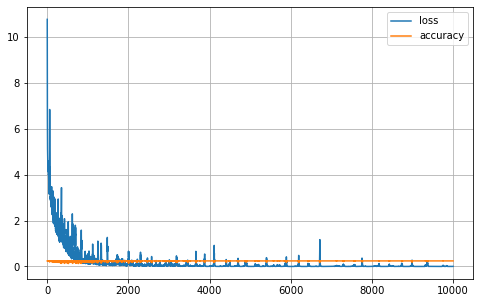

In [30]:
#plots the loss and Accuracy over time
pd.DataFrame(plot_data.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [31]:
#Predicts the test
predictions = model.predict(x_test)
print(predictions)

[[ 8.820016 ]
 [ 5.624084 ]
 [ 4.2542596]
 [ 0.6226475]
 [ 1.9853429]
 [ 7.124615 ]
 [ 5.655501 ]
 [ 6.540096 ]
 [ 0.6403326]
 [ 3.8729775]
 [ 6.635901 ]
 [ 0.8133543]
 [ 7.384608 ]
 [ 5.716662 ]
 [ 2.522141 ]
 [ 5.1383653]
 [ 1.6876905]
 [ 1.771725 ]
 [ 2.3918571]
 [ 2.6743975]
 [ 2.788762 ]
 [ 4.5763235]
 [ 6.489342 ]
 [10.0287695]
 [ 5.759886 ]
 [ 5.2454257]
 [ 4.6296153]
 [ 3.3667006]
 [ 5.88495  ]
 [ 3.126884 ]
 [ 6.013851 ]]


In [32]:
#Rounds the predictions
pred = predictions[: , 0]

count = 0;
for y in pred:
    y = np.round_(y, decimals=0, out=None)
    pred[count] = y
    count = count + 1
    
print(pred)

[ 9.  6.  4.  1.  2.  7.  6.  7.  1.  4.  7.  1.  7.  6.  3.  5.  2.  2.
  2.  3.  3.  5.  6. 10.  6.  5.  5.  3.  6.  3.  6.]


In [33]:
y_test = pd.DataFrame(y_test).to_numpy()
print(y_test)

[[8]
 [4]
 [6]
 [7]
 [2]
 [1]
 [6]
 [6]
 [1]
 [7]
 [8]
 [1]
 [8]
 [4]
 [2]
 [8]
 [8]
 [1]
 [5]
 [1]
 [2]
 [3]
 [5]
 [8]
 [2]
 [1]
 [3]
 [2]
 [8]
 [3]
 [6]]


In [34]:
from sklearn.metrics import confusion_matrix # imports a matrix Framework
#Creates and prints a confusion matrix
matrixType1 = confusion_matrix(y_test , pred)

print(matrixType1)
from sklearn.metrics import f1_score

print()
#Calcuates the F1 Score
f1_score(y_test, pred, average='micro')


[[2 1 1 0 1 0 1 0 0 0]
 [0 1 3 0 0 1 0 0 0 0]
 [0 0 1 0 2 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 2 1 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 1 1 2 0 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]



0.1935483870967742

In [35]:
from sklearn.metrics import classification_report
#Prints a classifcation report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.67      0.33      0.44         6
         2.0       0.25      0.20      0.22         5
         3.0       0.20      0.33      0.25         3
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         2
         6.0       0.29      0.50      0.36         4
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         7
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0

    accuracy                           0.19        31
   macro avg       0.14      0.14      0.13        31
weighted avg       0.23      0.19      0.19        31



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall 

In [36]:
#Testing the algorithm on the Training data

predictions = model.predict(x_train)
print(predictions)

#Rounds the predictions
pred = predictions[: , 0]

count = 0;
for y in pred:
    y = np.round_(y, decimals=0, out=None)
    pred[count] = y
    count = count + 1

#Creates and prints a confusion matrix
matrixType1 = confusion_matrix(y_train , pred)

print(matrixType1)

print()
#Calcuates the F1 Score
f1_score(y_train, pred, average='micro')

#Prints a classifcation report
print(classification_report(y_train, pred))

[[1.1041507 ]
 [6.0878367 ]
 [8.065033  ]
 [8.108478  ]
 [1.0799972 ]
 [2.0588374 ]
 [3.135102  ]
 [0.9809869 ]
 [2.029706  ]
 [4.050235  ]
 [6.0701766 ]
 [1.1023239 ]
 [9.067911  ]
 [9.075076  ]
 [0.99730647]
 [3.132729  ]
 [1.0560129 ]
 [1.032272  ]
 [1.9973236 ]
 [7.098087  ]
 [5.078622  ]
 [3.048261  ]
 [1.0647129 ]
 [1.1001277 ]
 [6.087133  ]
 [8.111196  ]
 [1.1338989 ]
 [1.0715426 ]
 [1.0401717 ]
 [6.081146  ]
 [9.003648  ]
 [4.0507045 ]
 [2.0481658 ]
 [4.017732  ]
 [4.06321   ]
 [3.0374827 ]
 [1.0740212 ]
 [4.03762   ]
 [7.0464725 ]
 [2.0713992 ]
 [4.0023293 ]
 [7.03407   ]
 [6.0663867 ]
 [8.177974  ]
 [8.102625  ]
 [5.077768  ]
 [3.0424237 ]
 [6.066933  ]
 [2.9944572 ]
 [1.0183762 ]
 [5.022494  ]
 [1.0572361 ]
 [6.9894285 ]
 [2.0781765 ]
 [1.2029825 ]
 [3.0757723 ]
 [6.0289497 ]
 [6.1082    ]
 [5.051315  ]
 [6.03694   ]
 [1.0871804 ]
 [2.0601516 ]
 [8.04334   ]
 [1.0401797 ]
 [3.0575206 ]
 [1.0799669 ]
 [6.088795  ]
 [4.1338277 ]
 [2.029541  ]
 [7.010222  ]
 [6.087312  ]
 [3.02

### Performance Review


The confusion matrix shows that the neural network can get some predictions right for what a Pokémon’s habitat is depending on the stats and types of the Pokémon. However, it got a total of 6 correctly identified and 23 incorrectly identified. As well as and F1 score of approximately 0.2.

An F1 score is not great as it can only correctly predict the habitat correctly 22% of the time in a neural network a low F1 score can be caused by a number of problems.

A problem the algorithm could be facing is over fitting as there are lots of neurons for a small set of data. Because of the split the algorithm can only train on 120 entries in the set, the rest are used for testing the algorithm to ensure its effectiveness. I used 4 layers of neurons 10 in the input neuron as the data has 10 inputs, 256 in a hidden layer, another 256 in a different hidden layer and 1 in the output layer as there can only be 1 output for this data. This is a lot of parameters for a small dataset and could indicate the neural network is over fitting.

When testing to see this I created a confusion matrix for that data the algorithm trained on. It correctly predicted every Pokémon’s habitat and gave a F1 score of 1. This shows the neural network may be learning the data and not the problem that needs to be solved. This leads to another problem where the network learns the data that is given instead of the learning the problem that it is trying to solve, this can be caused by a data set being too small and the training data being too small.



### How To Improve

To solve the problem of overfitting for this neural network is to reduce the number of neurons in the hidden layers. This will reduce the number of parameters the network has and may lead to a higher F1 score. This may also lead to another problem which is underfitting, underfitting is making a network that is too simple to solve the problem (Patel, K 2019). By reducing the number of neurons in the neural network this could become a problem. However when simplifying the network it was still learning the data and overfitting for it which means there may be another issue.

However, the biggest issue if the neural network is learning the data set instead of the problem this could be caused by the small number of data the network is able to train on. By increasing the size of the training and testing data the network may be able to answer the problem of the data and not learn the data. The 151 Pokémon used are from the first generation of Pokémon by increasing the sample size to include generations 1 to 3 will increase the size to 386 (Bulbapedia, 2022) and give a train test split of 309 for testing and 77 for training. This increase in the size of data could be enough for the network to learn the problem instead of learning the data.

## Comparison

### K Nearest Neighbor

For The K Nearest Neighbour algorithm there was multiple done with changed the attributes the learning approach took. For this comparison I will only be using the algorithm with all attributes as this is what the neural network used and will provide a fair comparison

The following code was done by: Paul Adams

In [37]:
from sklearn.datasets import fetch_openml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn import metrics

from sklearn.decomposition import PCA # The Principal Component Analysis Toolkit

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [38]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_excel('GottaClassEmAll.xlsx',  sheet_name='GottaClassEmAll', header=0)

In [39]:
accuracies = [] #An array to hold the accuracy of the kNN classifier for different k values.

kVals = range(1,30,2) # Create a array of odd number from 0 to 10

inputs = df[['Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']]

inputs.shape

targets = df["Habitat"]
targets.shape

train_inputs = inputs[:100]
test_inputs = inputs[100:]

train_targets = targets[:100]
test_targets = targets[100:]
    
for k in kVals:
    
    model = KNeighborsClassifier(n_neighbors=k)  # Create a kNN model using the value of k
    model.fit(train_inputs, train_targets) 
    
    model.fit(train_inputs, train_targets)
    predictions = model.predict(test_inputs)
    
    score = model.score(test_inputs, test_targets) 
    accuracies.append(score * 100) # store the accuracy of the classifer
    print("K value=k%d, test accuracy=%.2f%%" % (k, score * 100))

K value=k1, test accuracy=3.92%
K value=k3, test accuracy=11.76%
K value=k5, test accuracy=11.76%
K value=k7, test accuracy=11.76%
K value=k9, test accuracy=9.80%
K value=k11, test accuracy=9.80%
K value=k13, test accuracy=11.76%
K value=k15, test accuracy=11.76%
K value=k17, test accuracy=11.76%
K value=k19, test accuracy=9.80%
K value=k21, test accuracy=11.76%
K value=k23, test accuracy=11.76%
K value=k25, test accuracy=11.76%
K value=k27, test accuracy=11.76%
K value=k29, test accuracy=11.76%


Text(0, 0.5, 'Accuracy')

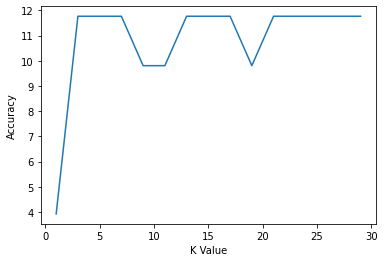

In [40]:
from matplotlib import pyplot as plt 
plt.plot(kVals, accuracies) 
plt.xlabel("K Value") 
plt.ylabel("Accuracy")

In [41]:
cfm = confusion_matrix(test_targets,predictions)
print(cfm)

[[ 6  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0]
 [ 6  1  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0]]


End Of Code By: Paul Adams

In [42]:
#Calcuates the F1 Score
f1_score(test_targets, predictions, average='micro')

0.11764705882352941

This algorithm got a low F1 score of 0.11 and could only predict about 11% of habitats correctly when using an optimal K value. However, the confusion matrix shows the algorithm heavily predicts habitat 1 over any other habitat, only 1 prediction was not habitat 1. When comparing the neural network, it shows that the network predicted a range of habitats, with a marginally higher accuracy than the K nearest neighbour approach to this problem. A smaller K value could show a different result as the accuracy was similar for a smaller value to the larger values being used. 

Another problem which could be affecting both algorithms is the small dataset, this would not let the data be as defined as the K Nearest Neighbour needed and cause the accuracy of the algorithm to be low, increasing the size of the training and testing data could create a more accurate algorithm.


### Clustering

The other approach to this problem was a clustering algorithm, for this I took to supervised approach to compare to the K means and Neural Network

The following code was done by: Josh Taylor

In [1]:
# Import required modules
from sklearn.datasets import fetch_openml
from sklearn import metrics, cluster, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#Access Excel file contents with pandas and define it as a dataframe
df = pd.read_excel('GottaClassEmAll.xlsx', sheet_name='GottaClassEmAll', header=0)

#Set data coloumn
supervised_type = df['Type 1']
supervised_habitat = df['Habitat']
supervised_legendary = df['Legendary']
unsupervised_total = df['Total']



#Deleted data coloumns id, type_1, type_2, total, legendary, habitat. 
del df['#']
del df['Type 1']
del df['Type 2']
del df['Total']
#del df['HP']
#del df['Attack']
#del df['Defense']
#del df['Sp. Atk']
#del df['Sp. Def']
#del df['Speed']
del df['Legendary']
del df['Habitat']

#print data frame
print(df)

      HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0     45      49       49       65       65     45
1     60      62       63       80       80     60
2     80      82       83      100      100     80
3     39      52       43       60       50     65
4     58      64       58       80       65     80
..   ...     ...      ...      ...      ...    ...
146   41      64       45       50       50     50
147   61      84       65       70       70     70
148   91     134       95      100      100     80
149  106     110       90      154       90    130
150  100     100      100      100      100    100

[151 rows x 6 columns]


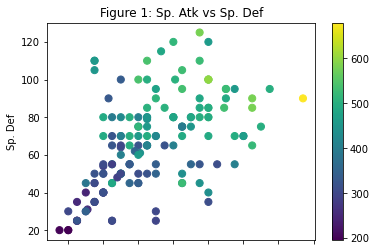

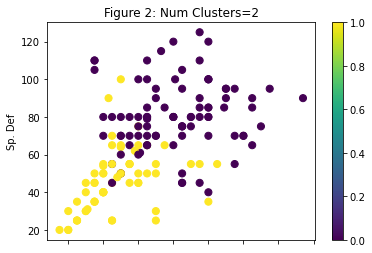

In [2]:
#The dataframe has a 6-Dimensional input. Visualising it in a 2D space can reveal patterns

#In figure 1, it dipicts 2 main fuzzy(soft) clusters; blue/darkblue and cyan/green/yellow. 
df.plot.scatter('Sp. Atk','Sp. Def', s=50, c=unsupervised_total, cmap='viridis')
plt.title("Figure 1: Sp. Atk vs Sp. Def")

#Using KMeans, map the values with the predicted number of clusters equal to 2
#Figure 2 portray similar properties to Figure 1
kmeans = cluster.KMeans(n_clusters=2)
pred_labels = kmeans.fit_predict(df)
df.plot.scatter('Sp. Atk','Sp. Def', s=50, c=pred_labels, cmap='viridis')
plt.title("Figure 2: Num Clusters=2")
plt.show()

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


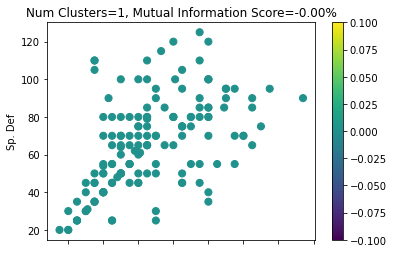

Num Clusters=1, Mutual Information Score=-0.00%


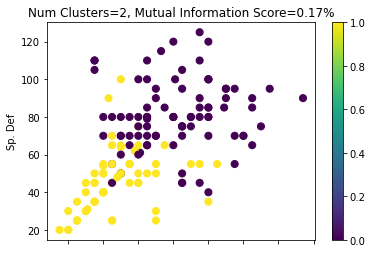

Num Clusters=2, Mutual Information Score=0.17%


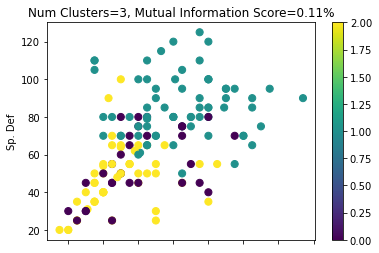

Num Clusters=3, Mutual Information Score=0.11%


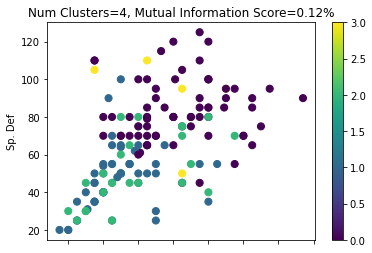

Num Clusters=4, Mutual Information Score=0.12%


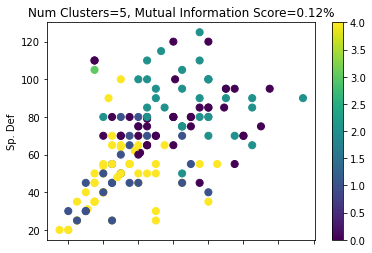

Num Clusters=5, Mutual Information Score=0.12%


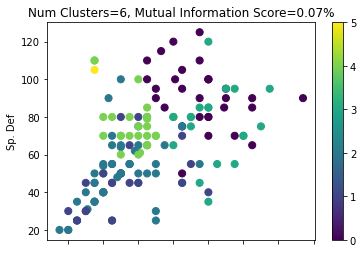

Num Clusters=6, Mutual Information Score=0.07%


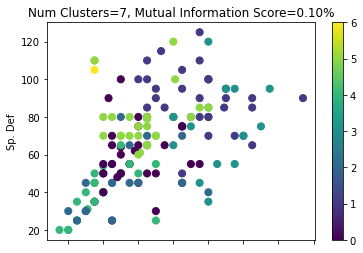

Num Clusters=7, Mutual Information Score=0.10%


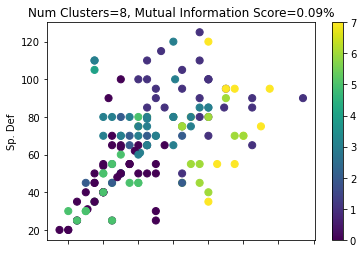

Num Clusters=8, Mutual Information Score=0.09%


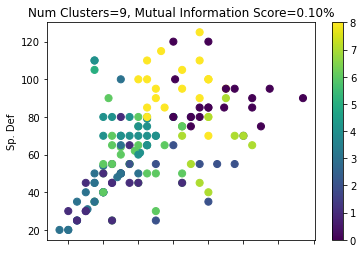

Num Clusters=9, Mutual Information Score=0.10%


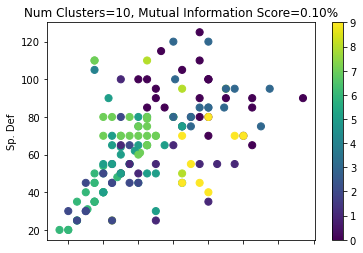

Num Clusters=10, Mutual Information Score=0.10%


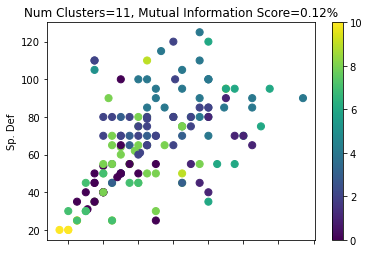

Num Clusters=11, Mutual Information Score=0.12%


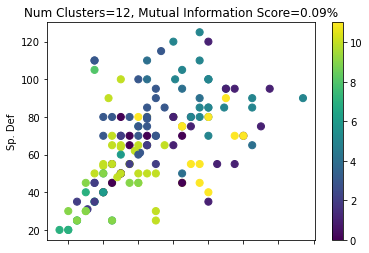

Num Clusters=12, Mutual Information Score=0.09%


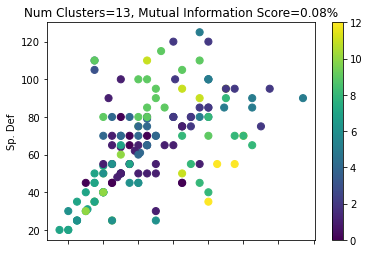

Num Clusters=13, Mutual Information Score=0.08%


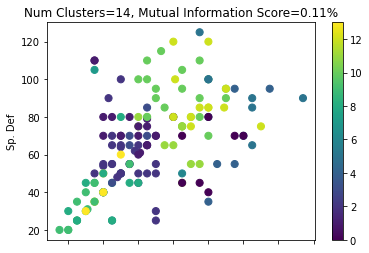

Num Clusters=14, Mutual Information Score=0.11%


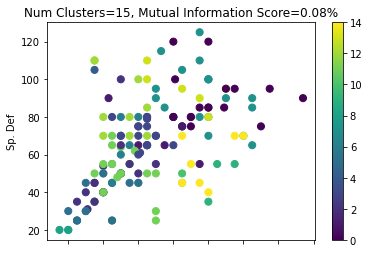

Num Clusters=15, Mutual Information Score=0.08%


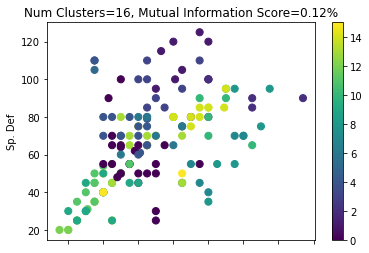

Num Clusters=16, Mutual Information Score=0.12%


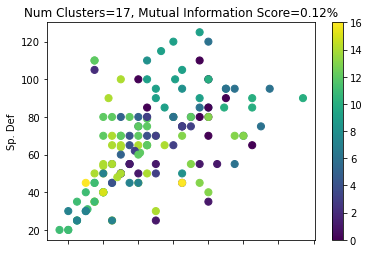

Num Clusters=17, Mutual Information Score=0.12%


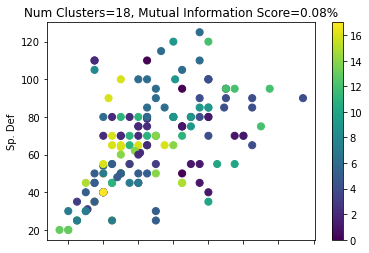

Num Clusters=18, Mutual Information Score=0.08%


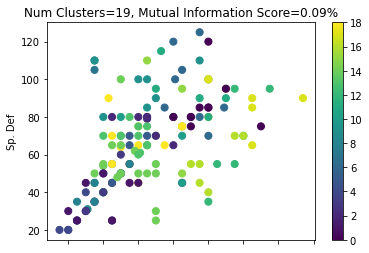

Num Clusters=19, Mutual Information Score=0.09%


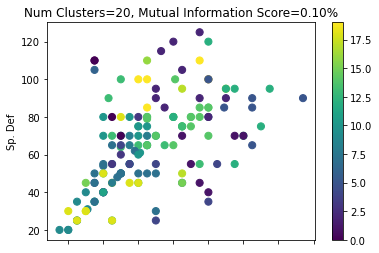

Num Clusters=20, Mutual Information Score=0.10%


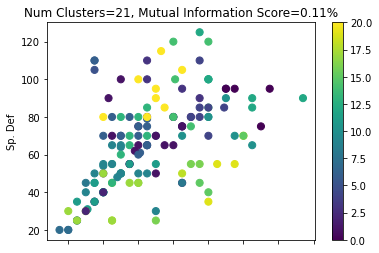

Num Clusters=21, Mutual Information Score=0.11%


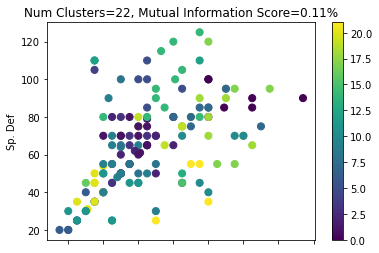

Num Clusters=22, Mutual Information Score=0.11%


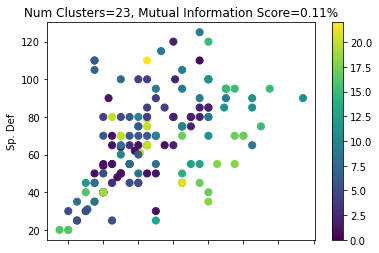

Num Clusters=23, Mutual Information Score=0.11%


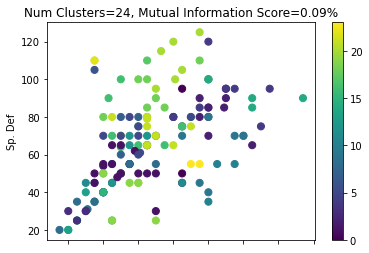

Num Clusters=24, Mutual Information Score=0.09%


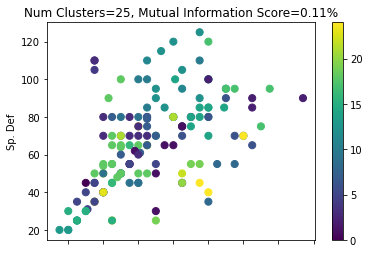

Num Clusters=25, Mutual Information Score=0.11%


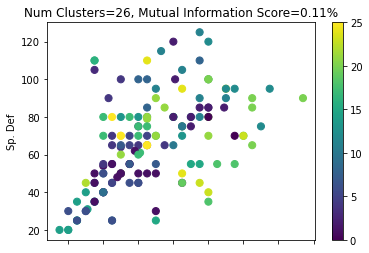

Num Clusters=26, Mutual Information Score=0.11%


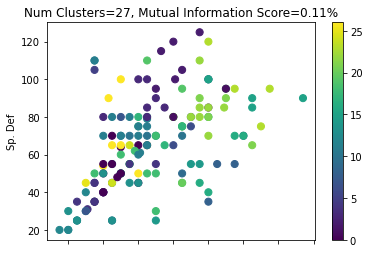

Num Clusters=27, Mutual Information Score=0.11%


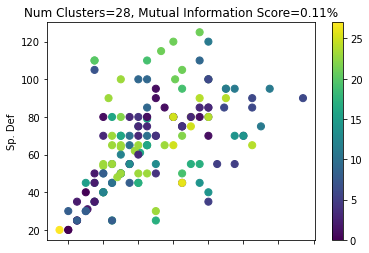

Num Clusters=28, Mutual Information Score=0.11%


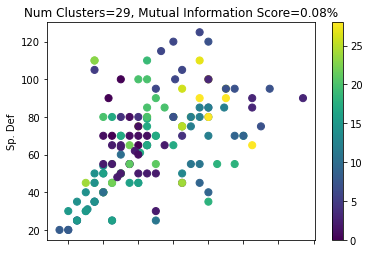

Num Clusters=29, Mutual Information Score=0.08%


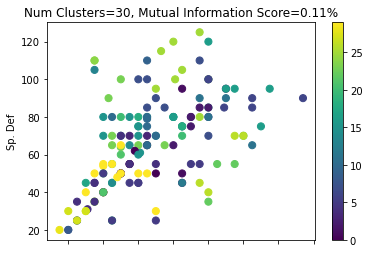

Num Clusters=30, Mutual Information Score=0.11%


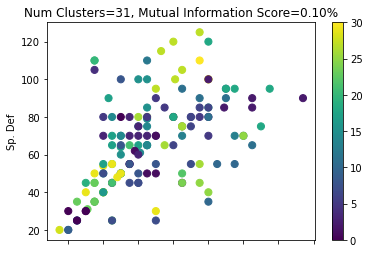

Num Clusters=31, Mutual Information Score=0.10%


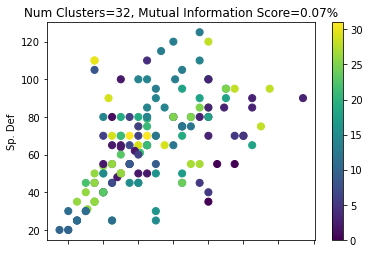

Num Clusters=32, Mutual Information Score=0.07%


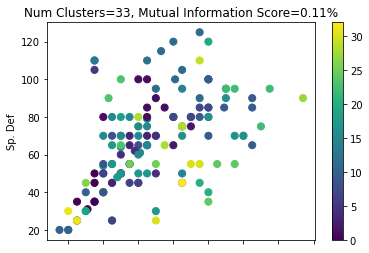

Num Clusters=33, Mutual Information Score=0.11%


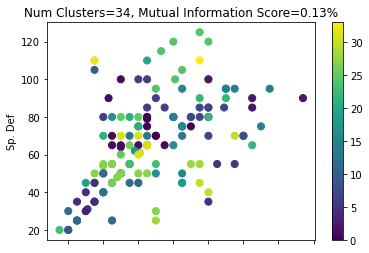

Num Clusters=34, Mutual Information Score=0.13%


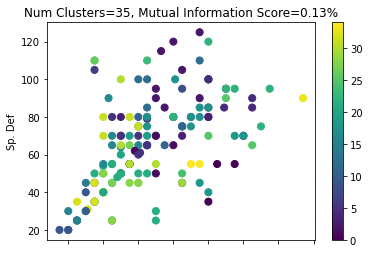

Num Clusters=35, Mutual Information Score=0.13%


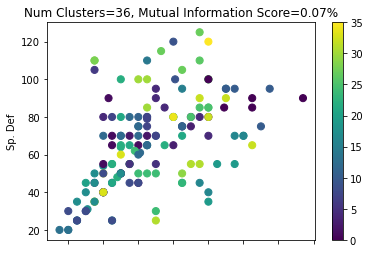

Num Clusters=36, Mutual Information Score=0.07%


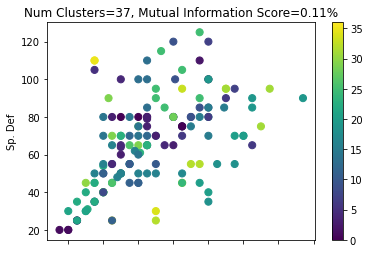

Num Clusters=37, Mutual Information Score=0.11%


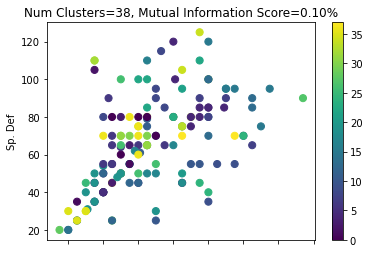

Num Clusters=38, Mutual Information Score=0.10%


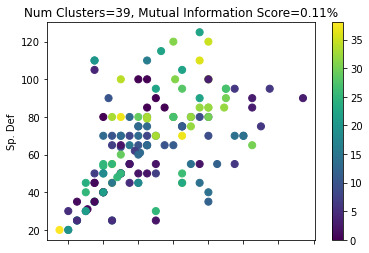

Num Clusters=39, Mutual Information Score=0.11%


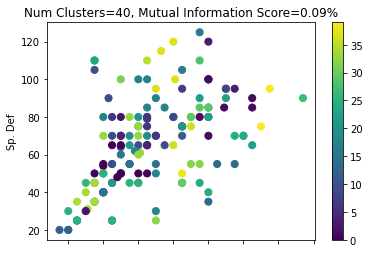

Num Clusters=40, Mutual Information Score=0.09%


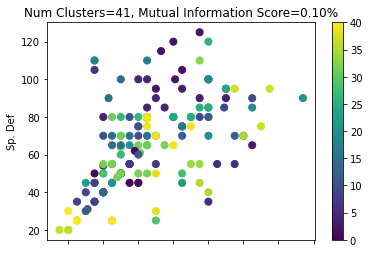

Num Clusters=41, Mutual Information Score=0.10%


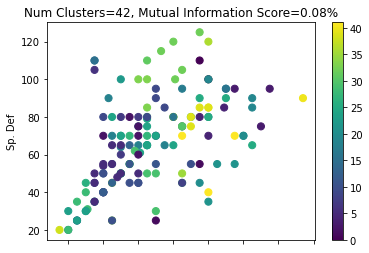

Num Clusters=42, Mutual Information Score=0.08%


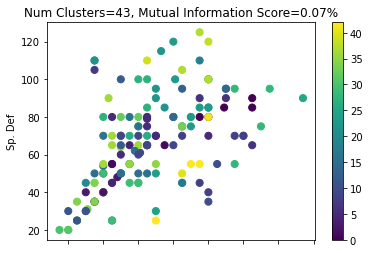

Num Clusters=43, Mutual Information Score=0.07%


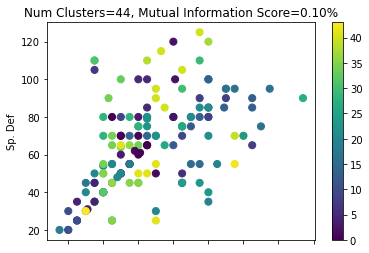

Num Clusters=44, Mutual Information Score=0.10%


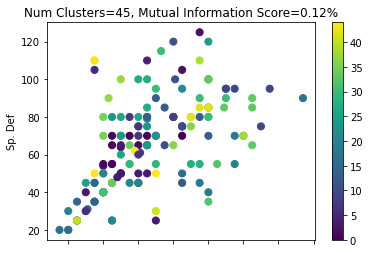

Num Clusters=45, Mutual Information Score=0.12%


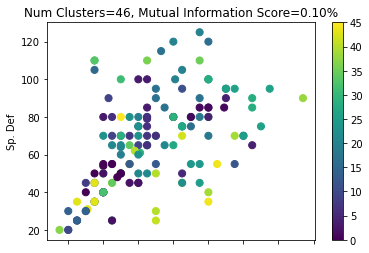

Num Clusters=46, Mutual Information Score=0.10%


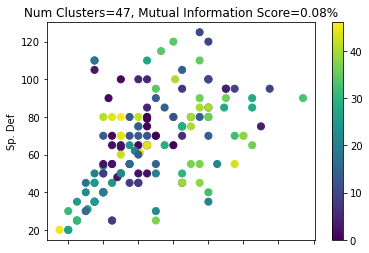

Num Clusters=47, Mutual Information Score=0.08%


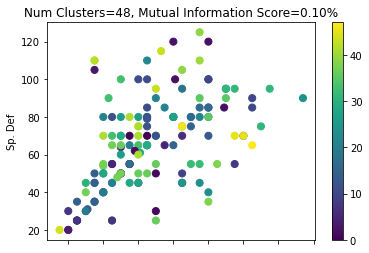

Num Clusters=48, Mutual Information Score=0.10%


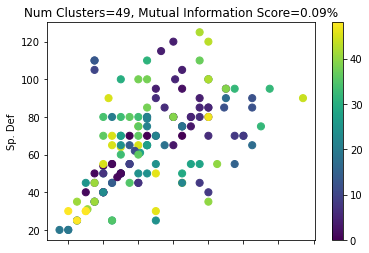

Num Clusters=49, Mutual Information Score=0.09%


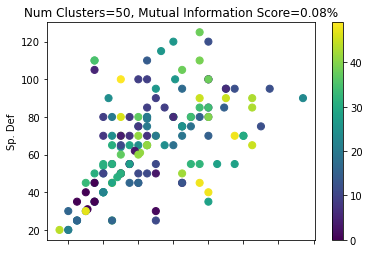

Num Clusters=50, Mutual Information Score=0.08%


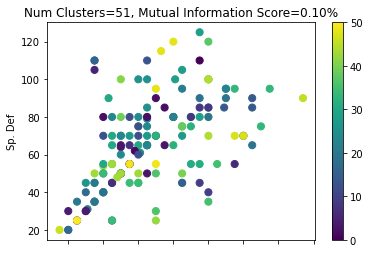

Num Clusters=51, Mutual Information Score=0.10%


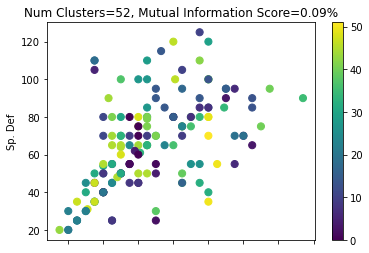

Num Clusters=52, Mutual Information Score=0.09%


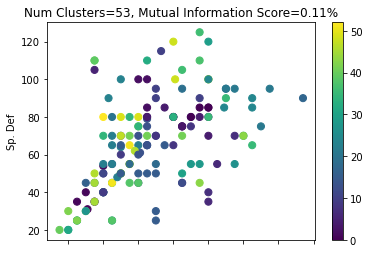

Num Clusters=53, Mutual Information Score=0.11%


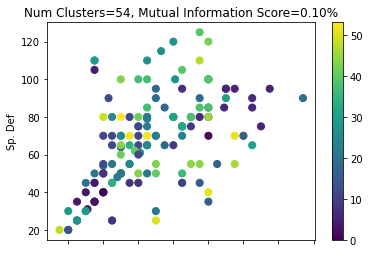

Num Clusters=54, Mutual Information Score=0.10%


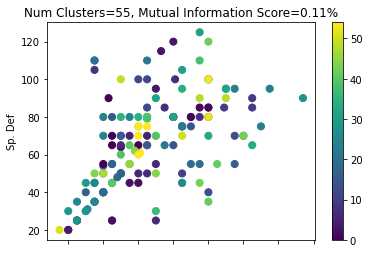

Num Clusters=55, Mutual Information Score=0.11%


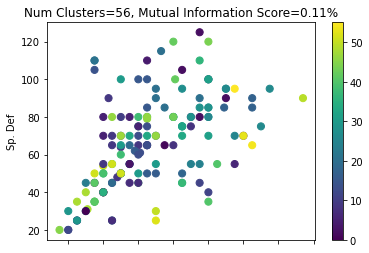

Num Clusters=56, Mutual Information Score=0.11%


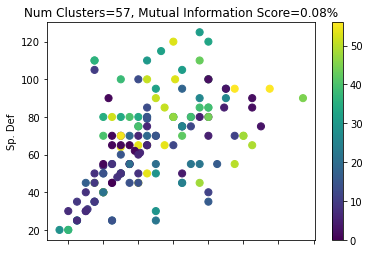

Num Clusters=57, Mutual Information Score=0.08%


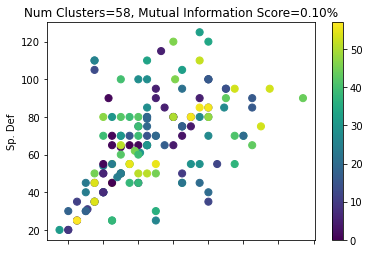

Num Clusters=58, Mutual Information Score=0.10%


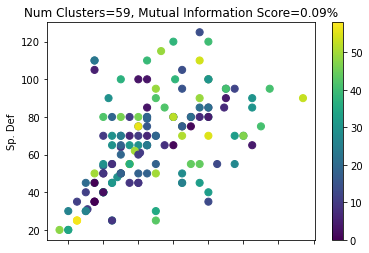

Num Clusters=59, Mutual Information Score=0.09%


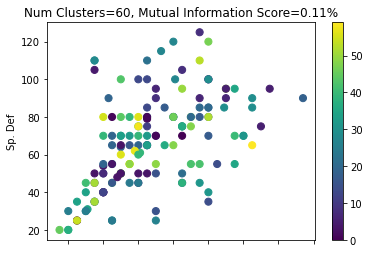

Num Clusters=60, Mutual Information Score=0.11%


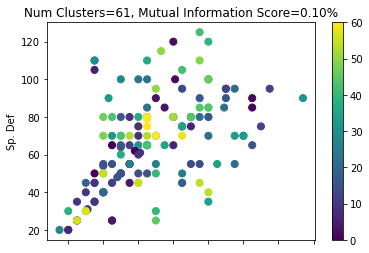

Num Clusters=61, Mutual Information Score=0.10%


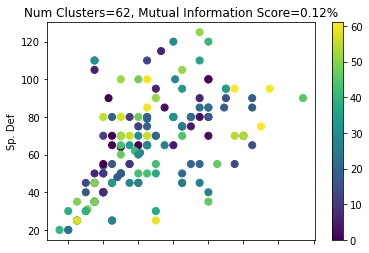

Num Clusters=62, Mutual Information Score=0.12%


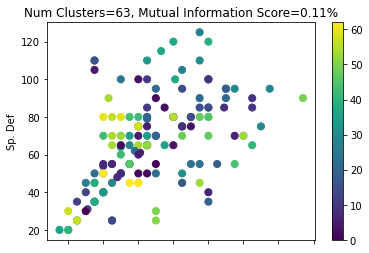

Num Clusters=63, Mutual Information Score=0.11%


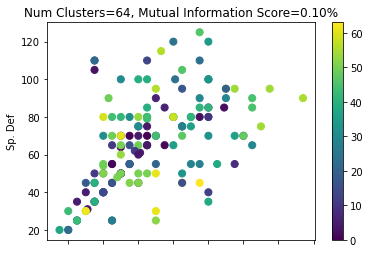

Num Clusters=64, Mutual Information Score=0.10%


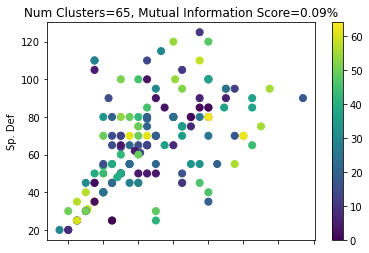

Num Clusters=65, Mutual Information Score=0.09%


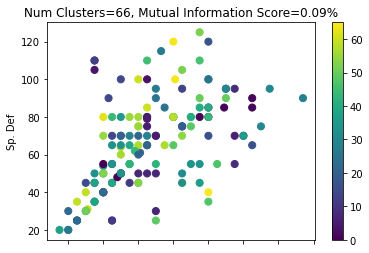

Num Clusters=66, Mutual Information Score=0.09%


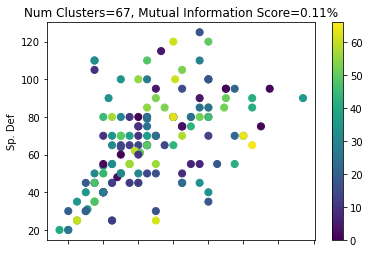

Num Clusters=67, Mutual Information Score=0.11%


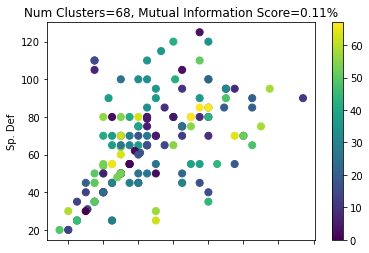

Num Clusters=68, Mutual Information Score=0.11%


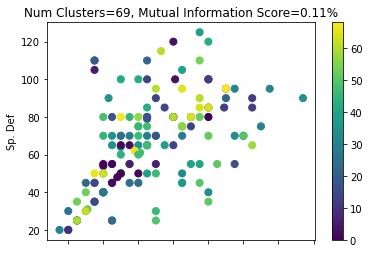

Num Clusters=69, Mutual Information Score=0.11%


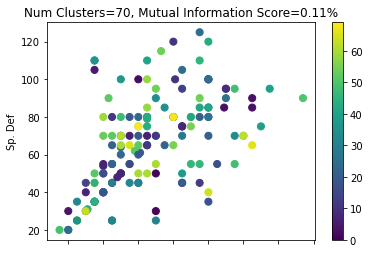

Num Clusters=70, Mutual Information Score=0.11%


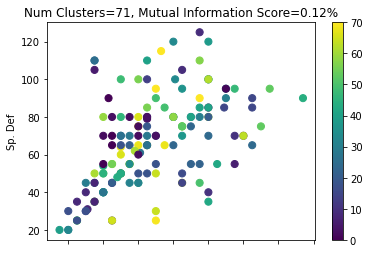

Num Clusters=71, Mutual Information Score=0.12%


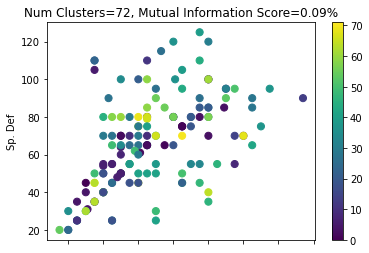

Num Clusters=72, Mutual Information Score=0.09%


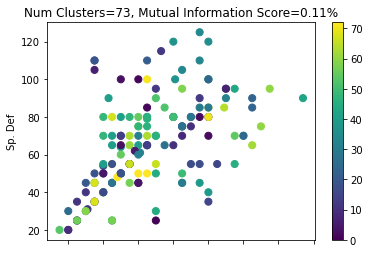

Num Clusters=73, Mutual Information Score=0.11%


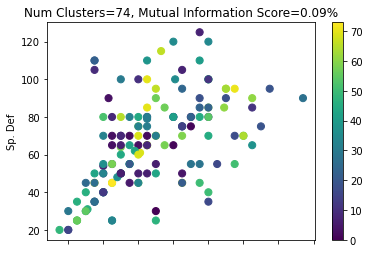

Num Clusters=74, Mutual Information Score=0.09%


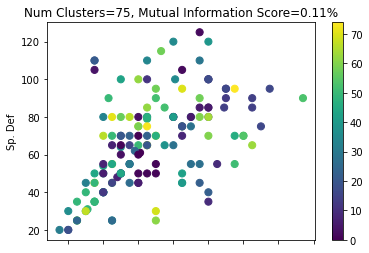

Num Clusters=75, Mutual Information Score=0.11%


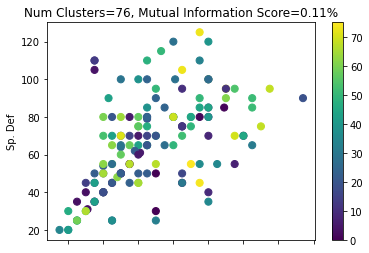

Num Clusters=76, Mutual Information Score=0.11%


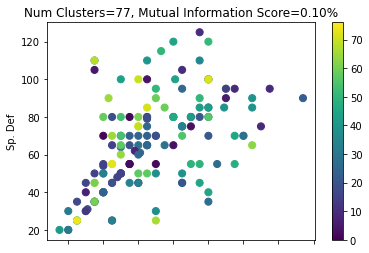

Num Clusters=77, Mutual Information Score=0.10%


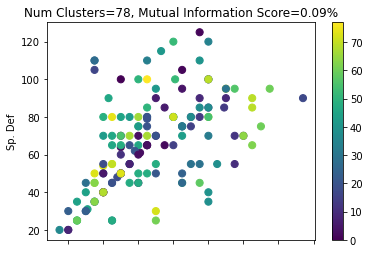

Num Clusters=78, Mutual Information Score=0.09%


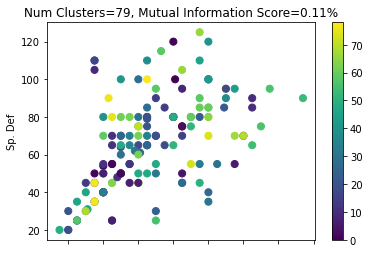

Num Clusters=79, Mutual Information Score=0.11%


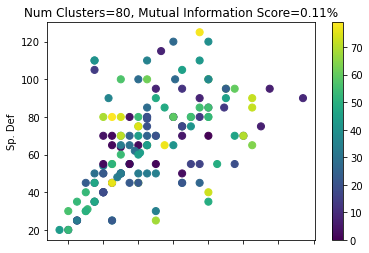

Num Clusters=80, Mutual Information Score=0.11%


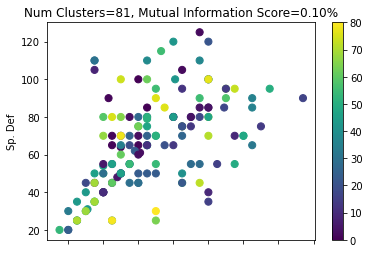

Num Clusters=81, Mutual Information Score=0.10%


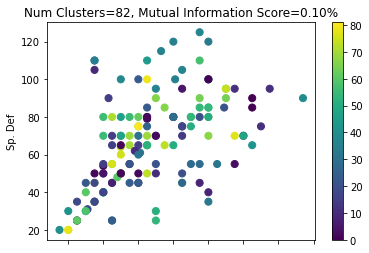

Num Clusters=82, Mutual Information Score=0.10%


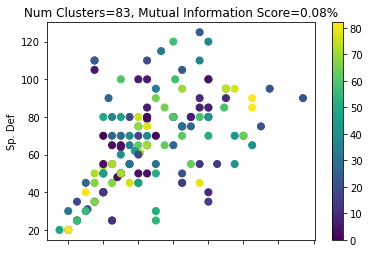

Num Clusters=83, Mutual Information Score=0.08%


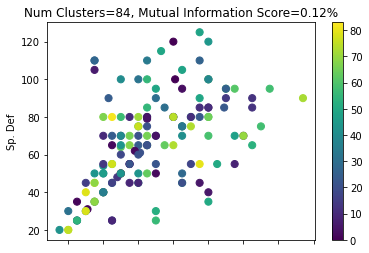

Num Clusters=84, Mutual Information Score=0.12%


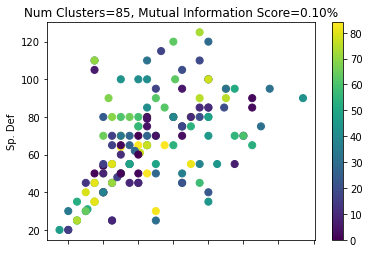

Num Clusters=85, Mutual Information Score=0.10%


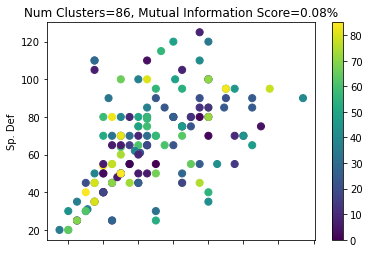

Num Clusters=86, Mutual Information Score=0.08%


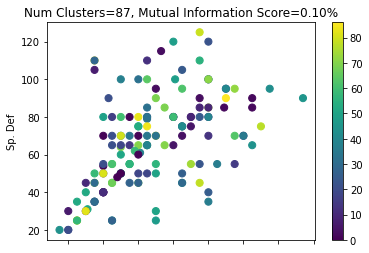

Num Clusters=87, Mutual Information Score=0.10%


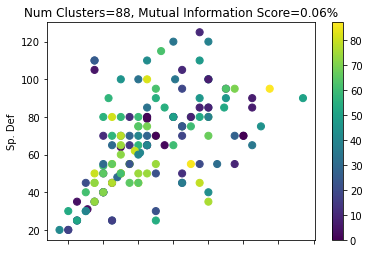

Num Clusters=88, Mutual Information Score=0.06%


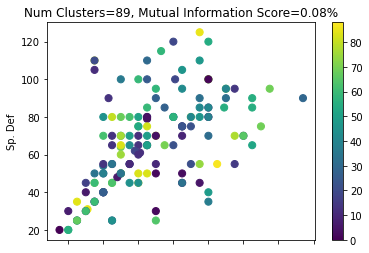

Num Clusters=89, Mutual Information Score=0.08%


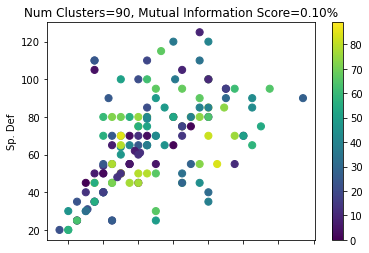

Num Clusters=90, Mutual Information Score=0.10%


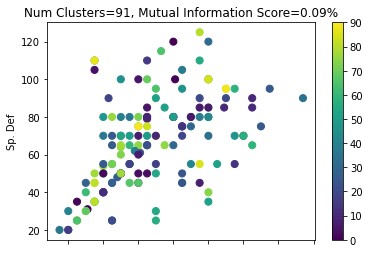

Num Clusters=91, Mutual Information Score=0.09%


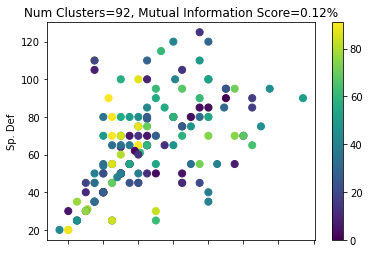

Num Clusters=92, Mutual Information Score=0.12%


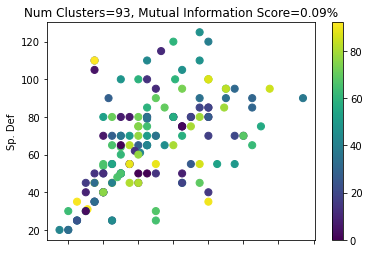

Num Clusters=93, Mutual Information Score=0.09%


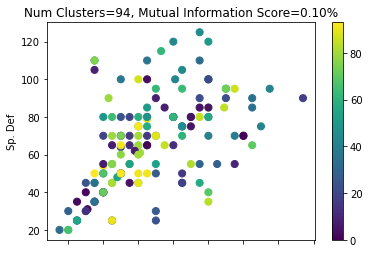

Num Clusters=94, Mutual Information Score=0.10%


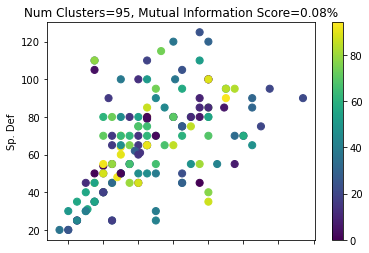

Num Clusters=95, Mutual Information Score=0.08%


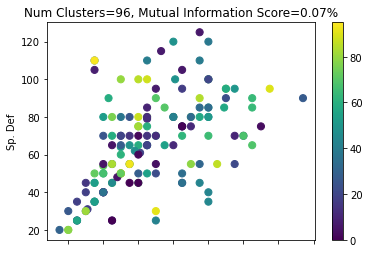

Num Clusters=96, Mutual Information Score=0.07%


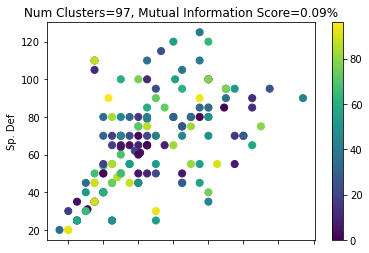

Num Clusters=97, Mutual Information Score=0.09%


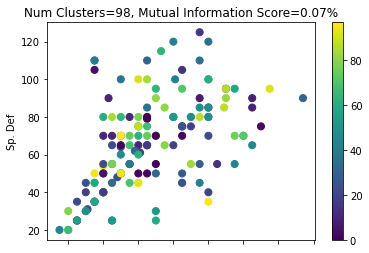

Num Clusters=98, Mutual Information Score=0.07%


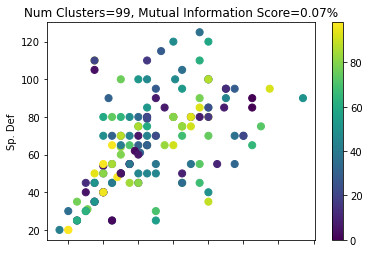

Num Clusters=99, Mutual Information Score=0.07%


In [3]:
# An array of number 1 to 100 representing incremental numbers of clusters
clusters = range(1, 100)  
# An empty array that will store the Mutual Information Scores
mutual_information_scores = []   

# Loop of each possible value for num clusters
for num_clusters in clusters: 

    #perform clusterd and predict labels
    kmeans = cluster.KMeans(n_clusters=num_clusters)
    pred_labels = kmeans.fit_predict(df)

    #Calculate mutual informaiton score between known labels and predicted labels
    mutual_information_score= metrics.adjusted_mutual_info_score(pred_labels, unsupervised_total)
    mutual_information_scores.append(mutual_information_score)

    df.plot.scatter('Sp. Atk','Sp. Def', s=50, c=pred_labels, cmap='viridis')
    plt.title("Num Clusters=%d, Mutual Information Score=%.2f%%"% (num_clusters, mutual_information_score))
    plt.show()
    print("Num Clusters=%d, Mutual Information Score=%.2f%%"% (num_clusters, mutual_information_score))
    

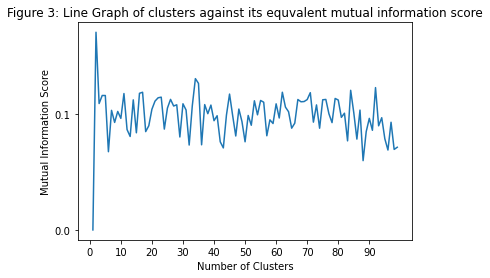

In [4]:
#Graphing the result
plt.plot(clusters, mutual_information_scores)
plt.title("Figure 3: Line Graph of clusters against its equvalent mutual information score")
#Figure 3: The graph peaks at number of clusters = 2 ∴ verifying the original theory and the data can be classified as (Strong/Weak) Pokémon
plt.xlabel("Number of Clusters")
plt.ylabel("Mutual Information Score")
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 0.2, 0.1))
plt.show()

End of code by: Josh Taylor

In [11]:
from sklearn.metrics import confusion_matrix 

#Creates and prints a confusion matrix
matrixType1 = confusion_matrix(supervised_type , pred_labels)

listm = matrixType1.tolist()

print(matrixType1)

from sklearn.metrics import f1_score

#Calcuates the F1 Score
f1_score(supervised_type, pred_labels, average='micro')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.006622516556291391

From this the Algorithm got an F1 Score of 0.006 this is a very low score which means the clustering algorithm was very ineffective in solving the problem with clustering only 0.6% of the Pokémon into the correct habitat. The confusion matrix shows that the algorithm was predicting a wide range of habitats. However, these were not very accurate as the F1 score was very low.
This could be due to the size of the dataset as the small amount of data could not accurately be reflected by the clusters and the cluster may not be well defined when the algorithm is running as the data may be to spread out for it to function correctly.


However, since all algorithms performed badly there may be another problem with the data being used for this. There may be not connection between a Pokémon’s stats and the habitat they live in. A solution would be to use other data for see if this is the problem, an image recognition could be used to predict the habitat of Pokémon as the stats may not have defined where the Pokémon lives but the look of the Pokémon.

The size of the data also affected all the algorithms so a bigger dataset may cause a connection to be clear that can be used to predict habitats, by expanding to Generation 3 Pokémon could help this.


## Refences 

Brownlee, J (2020) Train-Test Split for Evaluating Machine Learning Algorithms Available at: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/ (Accessed: 26th April 2022)

Bulbapedia (2022) Stat Available at: https://bulbapedia.bulbagarden.net/wiki/Stat (Accessed: 25th April 2022)

Bulbapedia (2022) List of Pokémon by habitat Available at: https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_habitat (Accessed: 25th April 2022)

Javapoint (no date) Unsupervised Machine Learning Available at: https://www.javatpoint.com/unsupervised-machine-learning (Accessed: 26th April 2022)

Javapoint (no date) Supervised Machine Learning Available at: https://www.javatpoint.com/supervised-machine-learning (Accessed: 26th April 2022)

Patel, K (2019) Overfitting vs Underfitting in Neural Network and Comparison of Error rate with Complexity Graph Avaliable at: https://towardsdatascience.com/overfitting-vs-underfitting-ddc80c2fc00d (Accessed: 27th April 2022)

Mahanta, J (2017) Introduction to Neural Networks, Advantages and Applications Available at: https://towardsdatascience.com/introduction-to-neural-networks-advantages-and-applications-96851bd1a207 (Accessed: 26th April 2022)

Nabi, J (2018) Machine Learning — Multiclass Classification with Imbalanced Dataset Available at: https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a (Accessed: 26th April 2022)

N B, H (2019) Confusion Matrix, Accuracy, Precision, Recall, F1 Score Available at: https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd (Accessed: 26th April 2022)

Sagar, A (2019) 5 Techniques to Prevent Overfitting in Neural Networks Available at: https://www.kdnuggets.com/2019/12/5-techniques-prevent-overfitting-neural-networks.html (Accessed: 26th April 2022)
